###### https://scanpy-tutorials.readthedocs.io/en/latest/spatial/integration-scanorama.html

In [1]:
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scanorama
from matplotlib import rc_context

In [45]:
adata_spatial_anterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Anterior"
)
adata_spatial_posterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Posterior"
)

reading /beegfs/scratch/ric.cosr/ric.cosr/DellabonaP/CosMX/5_Raw_data/R5630_Slide2/data/V1_Mouse_Brain_Sagittal_Anterior/filtered_feature_bc_matrix.h5
 (0:00:00)


/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9.26M/9.26M [00:01<00:00, 9.36MB/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20.1M/20.1M [00:01<00:00, 12.4MB/s]

reading /beegfs/scratch/ric.cosr/ric.cosr/DellabonaP/CosMX/5_Raw_data/R5630_Slide2/data/V1_Mouse_Brain_Sagittal_Posterior/filtered_feature_bc_matrix.h5


 (0:00:00)


/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [46]:
adata_spatial_anterior.var_names_make_unique()
adata_spatial_posterior.var_names_make_unique()
sc.pp.calculate_qc_metrics(adata_spatial_anterior, inplace=True)
sc.pp.calculate_qc_metrics(adata_spatial_posterior, inplace=True)

In [47]:
for adata in [
    adata_spatial_anterior,
    adata_spatial_posterior,
]:
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [67]:
adata_spatial_anterior

AnnData object with n_obs × n_vars = 2695 × 32285
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg'
    obsm: 'spatial'

In [68]:
adatas = [adata_spatial_anterior, adata_spatial_posterior]
adatas_cor = scanorama.correct_scanpy(adatas, return_dimred=True)

Found 32285 genes among all datasets
[[0.         0.47958271]
 [0.         0.        ]]
Processing datasets (0, 1)


In [69]:
adatas_cor[0].uns["spatial"]

{'V1_Mouse_Brain_Sagittal_Anterior': {'images': {'hires': array([[[0.7176471 , 0.7372549 , 0.7294118 ],
           [0.7176471 , 0.7372549 , 0.7294118 ],
           [0.7176471 , 0.73333335, 0.7254902 ],
           ...,
           [0.7254902 , 0.74509805, 0.73333335],
           [0.7254902 , 0.74509805, 0.73333335],
           [0.7254902 , 0.74509805, 0.73333335]],
   
          [[0.7176471 , 0.7372549 , 0.7294118 ],
           [0.7176471 , 0.73333335, 0.7254902 ],
           [0.7176471 , 0.73333335, 0.7254902 ],
           ...,
           [0.7254902 , 0.74509805, 0.73333335],
           [0.7254902 , 0.7411765 , 0.73333335],
           [0.7254902 , 0.7411765 , 0.73333335]],
   
          [[0.7176471 , 0.73333335, 0.7254902 ],
           [0.7176471 , 0.7372549 , 0.7294118 ],
           [0.7176471 , 0.73333335, 0.7294118 ],
           ...,
           [0.7254902 , 0.7411765 , 0.73333335],
           [0.72156864, 0.7411765 , 0.73333335],
           [0.7254902 , 0.74509805, 0.73333335]],
   


In [49]:
adata_spatial = sc.concat(
    adatas_cor,
    label="library_id",
    uns_merge="unique",
    keys=[
        k
        for d in [
            adatas_cor[0].uns["spatial"],
            adatas_cor[1].uns["spatial"],
        ]
        for k, v in d.items()
    ],
    index_unique="-",
)

In [55]:
#adatas_cor[0].uns["spatial"]

In [52]:
keys=[
        k
        for d in [
            adatas_cor[0].uns["spatial"],
            adatas_cor[1].uns["spatial"],
        ]
        for k, v in d.items()
    ]

In [53]:
keys

['V1_Mouse_Brain_Sagittal_Anterior', 'V1_Mouse_Brain_Sagittal_Posterior']

In [50]:
sc.pp.neighbors(adata_spatial, use_rep="X_scanorama")
sc.tl.umap(adata_spatial)
sc.tl.leiden(adata_spatial, key_added="clusters")

computing neighbors


/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)
running Leiden clustering
    finished: found 24 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


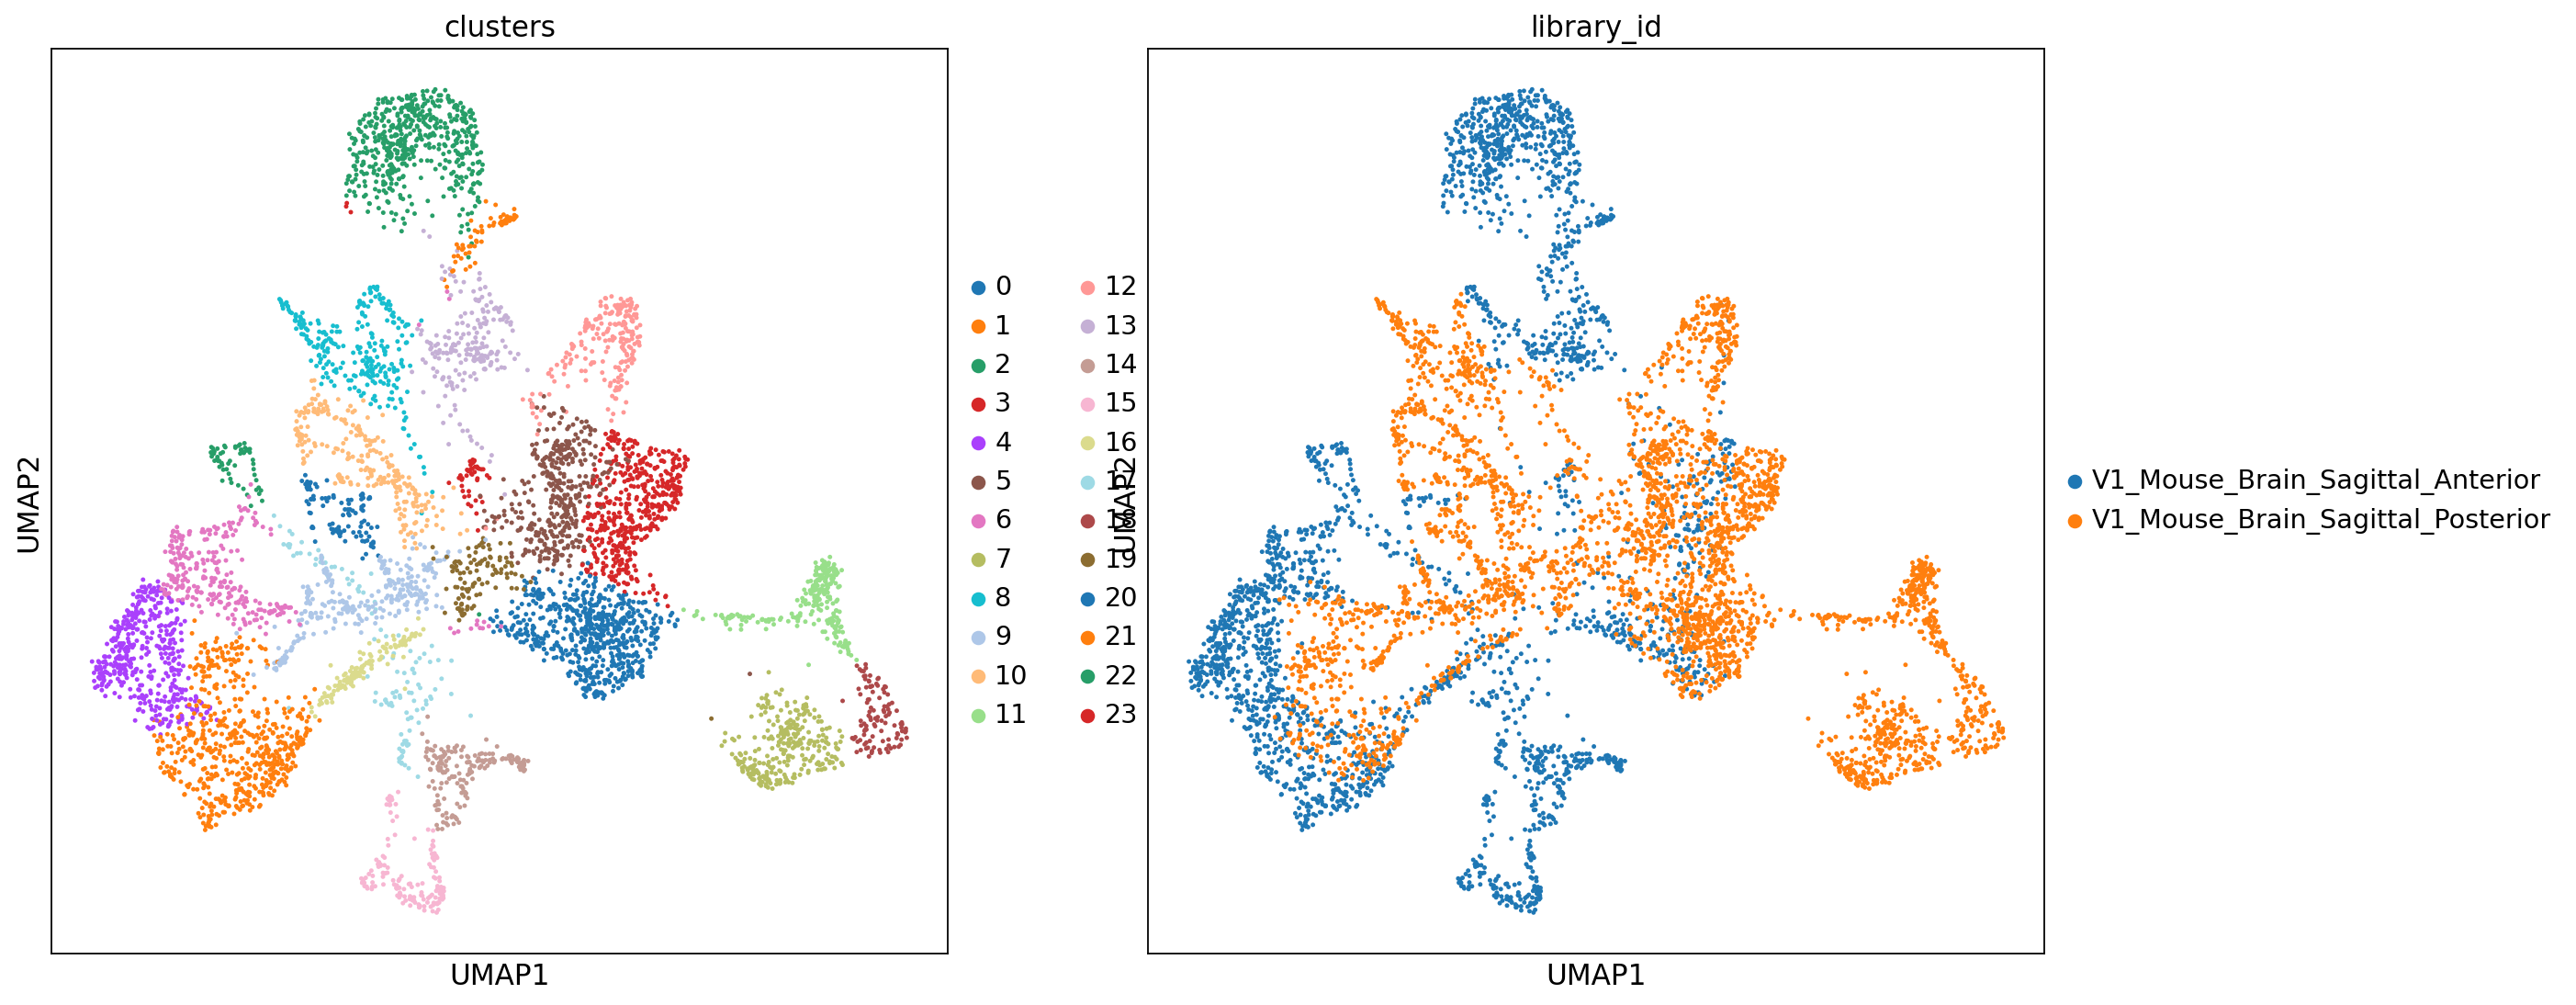

In [51]:
sc.pl.umap(
    adata_spatial, color=["clusters", "library_id"], palette=sc.pl.palettes.default_20
)


In [ ]:
###############

In [3]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

-----
anndata     0.9.1
scanpy      1.9.3
-----
PIL                 9.4.0
annoy               NA
asciitree           NA
asttokens           NA
backcall            0.2.0
cffi                1.15.1
cloudpickle         2.2.1
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.0
dask                2023.4.0
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
executing           1.2.0
fasteners           0.17.3
fbpca               NA
h5py                3.8.0
igraph              0.10.4
importlib_resources NA
intervaltree        NA
ipykernel           6.14.0
ipython_genutils    0.2.0
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
jupyter_server      2.5.0
kiwisolver          1.4.4
leidenalg           0.9.1
llvmlite            0.39.1
lz4                 4.3.2
markupsafe          2.1.2
matplotlib          3.7.1
mpl_toolkits        NA
msgpa

In [31]:
adata_spatial_anterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Anterior"
)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8.81M/8.81M [00:00<00:00, 9.98MB/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19.6M/19.6M [00:01<00:00, 13.0MB/s]

reading /beegfs/scratch/ric.cosr/ric.cosr/DellabonaP/CosMX/5_Raw_data/R5630_Slide2/data/V1_Mouse_Brain_Sagittal_Anterior/filtered_feature_bc_matrix.h5


 (0:00:00)


/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [32]:
adata_spatial_anterior

AnnData object with n_obs × n_vars = 2695 × 32285
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [179]:
adata_seurat_2.obs

orig.ident  nCount_Nanostring  nFeature_Nanostring   
R5630.Slide2_1_1      SeuratProject               95.0                   57  \
R5630.Slide2_2_1      SeuratProject               74.0                   52   
R5630.Slide2_3_1      SeuratProject               42.0                   29   
R5630.Slide2_4_1      SeuratProject              115.0                   67   
R5630.Slide2_5_1      SeuratProject               98.0                   62   
...                             ...                ...                  ...   
R5630.Slide2_3820_11  SeuratProject               90.0                   62   
R5630.Slide2_3822_11  SeuratProject               44.0                   32   
R5630.Slide2_3823_11  SeuratProject               26.0                   19   
R5630.Slide2_3824_11  SeuratProject               69.0                   49   
R5630.Slide2_3826_11  SeuratProject              100.0                   40   

                          cell_ID  fov  Area  AspectRatio  Width  Height   
R5630.Slide2_1_1          c_2_1_1    1  3467         1.10     75      68  \
R5630.Slide2_2_1          c_2_1_2    1  3122         1.27     76      60   
R5630.Slide2_3_1          c_2_1_3    1  1600         1.28     55      43   
R5630.Slide2_4_1          c_2_1_4    1  3546         0.80     69      86   
R5630.Slide2_5_1          c_2_1_5    1  3266         1.11     80      72   
...                           ...  ...   ...          ...    ...     ...   
R5630.Slide2_3820_11  c_2_11_3820   11  3373         0.87     65      75   
R5630.Slide2_3822_11  c_2_11_3822   11  1184         0.60     35      58   
R5630.Slide2_3823_11  c_2_11_3823   11  1932         1.39     64      46   
R5630.Slide2_3824_11  c_2_11_3824   11  1545         1.29     54      42   
R5630.Slide2_3826_11  c_2_11_3826   11  2372         1.74     75      43   

                      Mean.CD298  ...  slide_ID_numeric  Run_Tissue_name   
R5630.Slide2_1_1             119  ...                 2     R5630_Slide2  \
R5630.Slide2_2_1             109  ...                 2     R5630_Slide2   
R5630.Slide2_3_1             126  ...                 2     R5630_Slide2   
R5630.Slide2_4_1             161  ...                 2     R5630_Slide2   
R5630.Slide2_5_1              90  ...                 2     R5630_Slide2   
...                          ...  ...               ...              ...   
R5630.Slide2_3820_11          76  ...                 2     R5630_Slide2   
R5630.Slide2_3822_11          48  ...                 2     R5630_Slide2   
R5630.Slide2_3823_11         185  ...                 2     R5630_Slide2   
R5630.Slide2_3824_11         148  ...                 2     R5630_Slide2   
R5630.Slide2_3826_11           9  ...                 2     R5630_Slide2   

                      log10totalcounts    IFcolor      nb_clus  leiden_clus   
R5630.Slide2_1_1              1.977724  #768378FF            e          4.0  \
R5630.Slide2_2_1              1.869232  #C88A9CFF            e          4.0   
R5630.Slide2_3_1              1.623249  #6D8E6AFF            e          4.0   
R5630.Slide2_4_1              2.060698  #FFC3A6FF            e          4.0   
R5630.Slide2_5_1              1.982271  #CE758AFF            e          4.0   
...                                ...        ...          ...          ...   
R5630.Slide2_3820_11          1.954243  #4C800EFF            c          7.0   
R5630.Slide2_3822_11          1.643453  #2E1707FF  endothelial          2.0   
R5630.Slide2_3823_11          1.414973  #526519FF            c          4.0   
R5630.Slide2_3824_11          1.826075  #3A470BFF            c          7.0   
R5630.Slide2_3826_11          2.000000  #126E00FF            f          6.0   

                      nclust                    id  temp_1 temp_2  
R5630.Slide2_1_1      niche4      R5630.Slide2_1_1       1      1  
R5630.Slide2_2_1      niche4      R5630.Slide2_2_1       2      1  
R5630.Slide2_3_1      niche4      R5630.Slide2_3_1       3      1  
R5630.Slide2_4_1      niche4 

In [165]:
#read the data from the single samples
adata_seurat = sc.read_h5ad("../../CosMx.h5ad")
adata_seurat_2 = sc.read_h5ad("adata_sub_2.h5ad")
adata_seurat_3 = sc.read_h5ad("adata_sub_3.h5ad")
adata_seurat_4 = sc.read_h5ad("adata_sub_4.h5ad")

In [187]:
list(adata_seurat.obs)

['orig.ident',
 'nCount_Nanostring',
 'nFeature_Nanostring',
 'cell_ID',
 'fov',
 'Area',
 'AspectRatio',
 'Width',
 'Height',
 'Mean.CD298',
 'Max.CD298',
 'Mean.PanCK',
 'Max.PanCK',
 'Mean.CD68',
 'Max.CD68',
 'Mean.CD3',
 'Max.CD3',
 'Mean.DAPI',
 'Max.DAPI',
 'Slide_name',
 'Run_name',
 'ISH.concentration',
 'ALPHA',
 'tissue',
 'Run_Slide_name',
 'slide_ID_numeric',
 'Run_Tissue_name',
 'log10totalcounts',
 'IFcolor',
 'nb_clus',
 'leiden_clus',
 'nclust',
 'id',
 'temp_1',
 'temp_2',
 'temp_3']

In [372]:
adata_seurat_new = adata_seurat
#format cell names to match rawdata (adata.obs_names)
adata_seurat.obs["temp_1"] = adata_seurat.obs.cell_ID.str.split('_').str[-1]
adata_seurat.obs["temp_2"] = adata_seurat.obs.cell_ID.str.split('_').str[-2]

In [373]:
adata_seurat.obs["temp_3"] = adata_seurat.obs["temp_1"].astype(str) +"_"+ adata_seurat.obs["temp_2"] +"-"+adata_seurat.obs["tissue"]

In [374]:
adata_seurat.obs["temp_3"]= adata_seurat.obs["temp_3"].str.replace('S','s')


In [375]:
adata_seurat.obs["Idents"] = adata_seurat.obs["temp_3"]
adata_seurat.obs.index = adata_seurat.obs.Idents

In [376]:
adata_spatial_s.obs['nclust'] = adata_seurat.obs["nclust"]

In [377]:
adata_seurat_2.obs["nclust"]

R5630.Slide2_1_1        niche4
R5630.Slide2_2_1        niche4
R5630.Slide2_3_1        niche4
R5630.Slide2_4_1        niche4
R5630.Slide2_5_1        niche4
                         ...  
R5630.Slide2_3820_11    niche7
R5630.Slide2_3822_11    niche7
R5630.Slide2_3823_11    niche7
R5630.Slide2_3824_11    niche7
R5630.Slide2_3826_11    niche7
Name: nclust, Length: 40288, dtype: object

In [265]:
adata_spatial_s.obs['nclust']

1_1-slide2        niche4
2_1-slide2        niche4
3_1-slide2        niche4
4_1-slide2        niche4
5_1-slide2        niche4
                   ...  
3681_10-slide4    niche1
3682_10-slide4    niche1
3683_10-slide4    niche1
3687_10-slide4    niche1
3688_10-slide4    niche1
Name: nclust, Length: 108946, dtype: object

In [167]:
set(adata_seurat.obs['nclust'])

{'niche1', 'niche2', 'niche3', 'niche4', 'niche5', 'niche6', 'niche7'}

In [ ]:
adata_seurat
ncols=2
nrows=1
figsize=4
wspace=0.5
fig,axs = plt.subplots(nrows=nrows, ncols=ncols,
                       figsize=(ncols*figsize+figsize*wspace*(ncols-1),nrows*figsize))
plt.subplots_adjust(wspace=wspace)
# This produces two Axes objects in a single Figure
print('axes:',axs)

sc.pl.umap(
    adata_spatial_s, color=["clusters"], palette=sns.color_palette("hls", 25), ax=axs[0],show=False, legend_loc="on data")

sc.pl.umap(
    adata_spatial_s, color=["new_clust"], palette=sc.pl.palettes.default_20, ax=axs[1])

In [48]:
#calculate standards QC metrics with pp.calculate_qc_metrics and visualize them.
adata_seurat_2.var_names_make_unique()
adata_seurat_3.var_names_make_unique()
adata_seurat_4.var_names_make_unique()
sc.pp.calculate_qc_metrics(adata_seurat_2, inplace=True)
sc.pp.calculate_qc_metrics(adata_seurat_3, inplace=True)
sc.pp.calculate_qc_metrics(adata_seurat_4, inplace=True)

/beegfs/scratch/tmp/ipykernel_66896/680796476.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
/beegfs/scratch/tmp/ipykernel_66896/680796476.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/beegfs/scratch/tmp/ipykernel_66896/680796476.py:

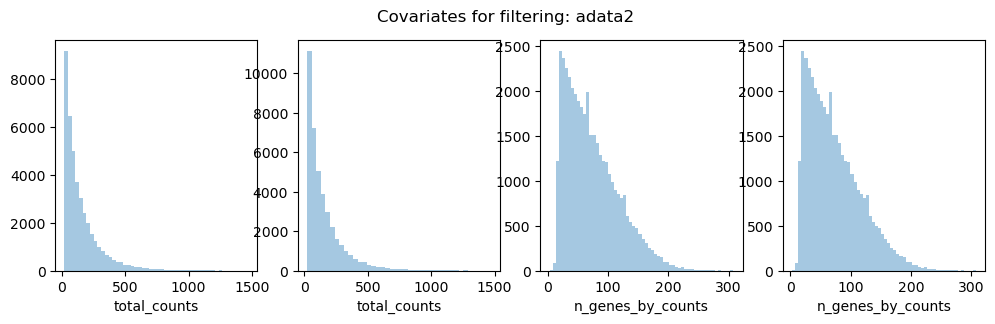

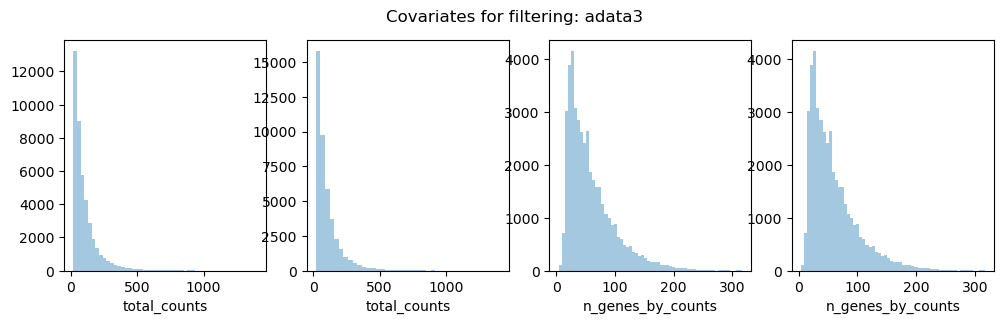

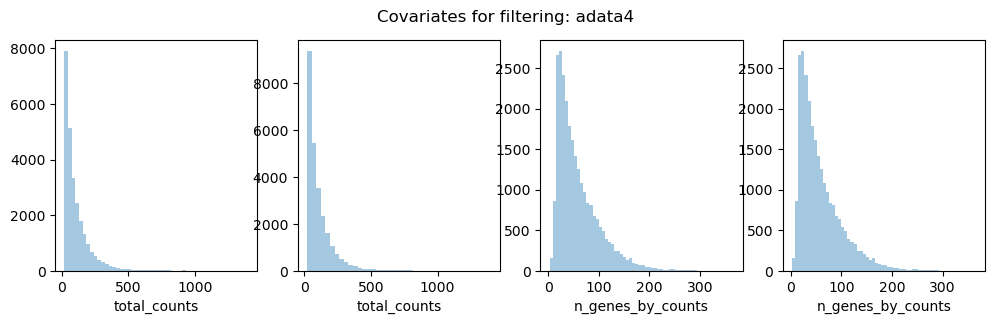

In [49]:
for name, adata in [
    ("adata2", adata_seurat_2),
    ("adata3", adata_seurat_3),
    ("adata4", adata_seurat_4),
]:
    fig, axs = plt.subplots(1, 4, figsize=(12, 3))
    fig.suptitle(f"Covariates for filtering: {name}")

    sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
    sns.distplot(
        adata.obs["total_counts"][adata.obs["total_counts"] < 20000],
        kde=False,
        bins=40,
        ax=axs[1],
    )
    sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
    sns.distplot(
        adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000],
        kde=False,
        bins=60,
        ax=axs[3],
    )

In [50]:
# normalize the data
for adata in [
    adata_seurat_2,
    adata_seurat_3,
    adata_seurat_4
]:
    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)


In [51]:
adata_seurat_4

AnnData object with n_obs × n_vars = 25765 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'Idents', 'responder', 'nb_clus'
    var: 'NegPrb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial', 'log1p'
    obsm: 'spatial', 'spatial_fov'
    layers: 'counts'

In [52]:
#adata.layers["counts"] = adata.X.copy()
#sc.pp.normalize_total(adata, inplace=True)
#sc.pp.log1p(adata)
#sc.pp.pca(adata)
#sc.pp.neighbors(adata)
#sc.tl.umap(adata)
#sc.tl.leiden(adata)

In [53]:
adata_seurat_2

AnnData object with n_obs × n_vars = 40288 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'Idents', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'responder', 'nb_clus'
    var: 'NegPrb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial', 'log1p'
    obsm: 'spatial', 'spatial_fov'
    layers: 'counts'

In [54]:
adata_seurat_4

AnnData object with n_obs × n_vars = 25765 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'Idents', 'responder', 'nb_clus'
    var: 'NegPrb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial', 'log1p'
    obsm: 'spatial', 'spatial_fov'
    layers: 'counts'

We are now ready to perform integration of the two dataset. As mentioned before, we will be using Scanorama for that. Scanorama returns two lists, one for the integrated embeddings and one for the corrected counts, for each dataset. We would like to note that in this context using BBKNN or Ingest is also possible.

In [55]:
adatas_s = [adata_seurat_2, adata_seurat_3, adata_seurat_4]
adatas_cor_s = scanorama.correct_scanpy(adatas_s, return_dimred=True)

Found 979 genes among all datasets
[[0.         0.47157963 0.26881428]
 [0.         0.         0.58591112]
 [0.         0.         0.        ]]
Processing datasets (1, 2)
Processing datasets (0, 1)
Processing datasets (0, 2)


In [56]:
adata_seurat_2

AnnData object with n_obs × n_vars = 40288 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'Idents', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'responder', 'nb_clus'
    var: 'NegPrb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial', 'log1p'
    obsm: 'spatial', 'spatial_fov'
    layers: 'counts'

In [57]:
#adatas_cor_s[2].uns["spatial"]

We will concatenate the three datasets and save the integrated embeddings in adata_spatial.obsm['scanorama_embedding']. Furthermore we will compute UMAP to visualize the results and qualitatively assess the data integration task.

Notice that we are concatenating the two dataset with uns_merge="unique" strategy, in order to keep both images from the visium datasets in the concatenated anndata object.

In [58]:
#adatas_cor[0].uns["spatial"]

In [59]:
keys=["slide2", "slide3", "slide4"]

In [60]:
adatas_cor_s

[AnnData object with n_obs × n_vars = 40288 × 979
     obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'Idents', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'responder', 'nb_clus'
     var: 'NegPrb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
     uns: 'spatial', 'log1p'
     obsm: 'spatial', 'spatial_fov', 'X_scanorama',
 AnnData object with n_obs × n_vars = 42893 × 979
     obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.Mem

In [61]:
adata_spatial_s = sc.concat(adatas_cor_s,
                          label="library_id",
                          uns_merge="first",
                          join="outer",
                          keys = ["slide2", "slide3", "slide4"], index_unique="-",)

In [223]:
adata_spatial_s.obs

fov  Area  AspectRatio  CenterX_global_px  CenterY_global_px   
1_1-slide2       1  3467         1.10     -106239.857143       26280.333333  \
2_1-slide2       1  3122         1.27     -106192.857143       26284.333333   
3_1-slide2       1  1600         1.28     -106091.857143       26292.333333   
4_1-slide2       1  3546         0.80     -106060.857143       26271.333333   
5_1-slide2       1  3266         1.11     -105875.857143       26278.333333   
...             ..   ...          ...                ...                ...   
3681_10-slide4  10  2427         1.45     -293836.000000       17126.190476   
3682_10-slide4  10  1629         0.96     -295198.000000       17126.190476   
3683_10-slide4  10  2632         2.21     -292937.000000       17121.190476   
3687_10-slide4  10  1680         2.09     -293987.000000       17118.190476   
3688_10-slide4  10  1341         2.92     -293332.000000       17114.190476   

                Width  Height  Mean.MembraneStain  Max.MembraneStain   
1_1-slide2         75      68                 119                363  \
2_1-slide2         76      60                 109                420   
3_1-slide2         55      43                 126                403   
4_1-slide2         69      86                 161                544   
5_1-slide2         80      72                  90                347   
...               ...     ...                 ...                ...   
3681_10-slide4     71      49                 160               1224   
3682_10-slide4     46      48                 251                901   
3683_10-slide4     86      39                 316                930   
3687_10-slide4     69      33                 115                507   
3688_10-slide4     73      25                 149                463   

                Mean.PanCK  ...  log1p_total_counts_NegPrb  pct_counts_NegPrb   
1_1-slide2              74  ...                   0.000000           0.000000  \
2_1-slide2              78  ...                   0.000000           0.000000   
3_1-slide2              80  ...                   0.000000           0.000000   
4_1-slide2             110  ...                   0.000000           0.000000   
5_1-slide2              66  ...                   1.098612           2.040816   
...                    ...  ...                        ...                ...   
3681_10-slide4         126  ...                   0.000000           0.000000   
3682_10-slide4         168  ...                   0.000000           0.000000   
3683_10-slide4         170  ...                   0.000000           0.000000   
3687_10-slide4         179  ...                   0.000000           0.000000   
3688_10-slide4         166  ...                   0.000000           0.000000   

                responder     nb_clus  library_id  clusters  new_clusters   
1_1-slide2             CR           e      slide2         1             e  \
2_1-slide2             CR           e      slide2         1             e   
3_1-slide2             CR           e      slide2         6             e   
4_1-slide2             CR           e      slide2         1             e   
5_1-slide2             CR           e      slide2         5             e   
...                   ...         ...         ...       ...           ...   
3681_10-slide4         CR           d      slide4        21             d   
3682_10-slide4         CR           d      slide4         7             d   
3683_10-slide4         CR           d      slide4         7             d   
3687_10-slide4         CR           d      slide4         7             d   
3688_10-slide4         CR  macrophage      slide4         2    macrophage   

                new_clus             new_clust  nclust  
1_1-slide2           NaN         e_basal_cells  niche4  
2_1-slide2           NaN         e_basal_cells  niche4  
3_1-slide2           NaN         e_basal_cells  niche4  
4_1-slide2           NaN         e_basal_cells  niche4  
5_1-slide2        

axes: [<Axes: > <Axes: >]


/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


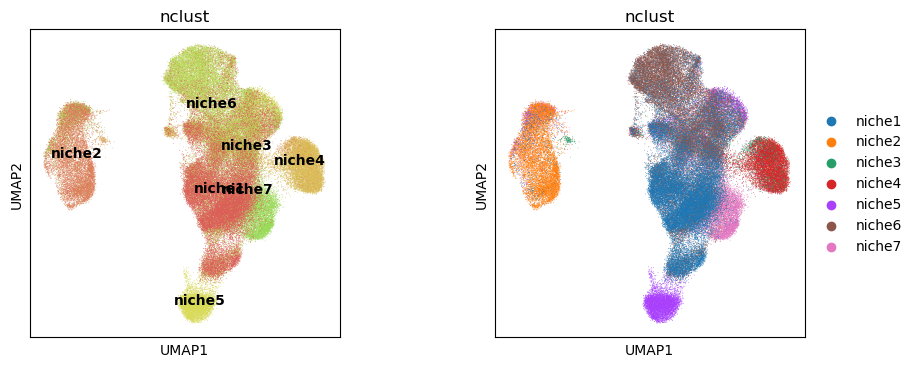

In [201]:
ncols=2
nrows=1
figsize=4
wspace=0.5
fig,axs = plt.subplots(nrows=nrows, ncols=ncols,
                       figsize=(ncols*figsize+figsize*wspace*(ncols-1),nrows*figsize))
plt.subplots_adjust(wspace=wspace)
# This produces two Axes objects in a single Figure
print('axes:',axs)

#sc.pl.umap(
#    adata_spatial_s, color=["nclust"], palette=sns.color_palette("hls", 25), ax=axs[0],show=False, legend_loc="on data")

sc.pl.umap(
    adata_spatial_s, color=["nclust"], palette=sc.pl.palettes.default_20, ax=axs[1])

axes: [<Axes: > <Axes: >]


/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


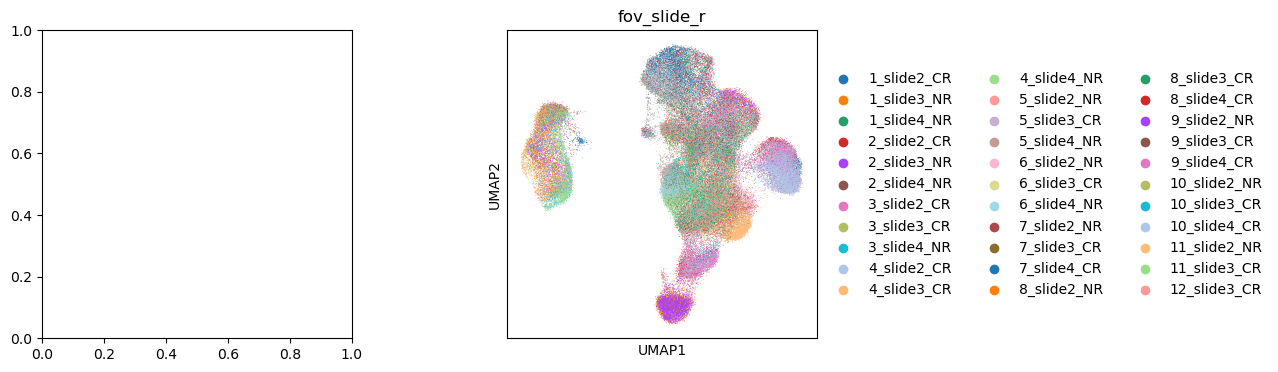

In [6]:
adata_spatial_s.obs["fov_slide"] = adata_spatial_s.obs['fov'].astype(str) +"_"+ adata_spatial_s.obs["library_id"].astype(str)
adata_spatial_s.obs["fov_slide_r"] = adata_spatial_s.obs['fov_slide'].astype(str) +"_"+ adata_spatial_s.obs["responder"].astype(str)


ncols=2
nrows=1
figsize=4
wspace=0.5
fig,axs = plt.subplots(nrows=nrows, ncols=ncols,
                       figsize=(ncols*figsize+figsize*wspace*(ncols-1),nrows*figsize))
plt.subplots_adjust(wspace=wspace)
# This produces two Axes objects in a single Figure
print('axes:',axs)

#sc.pl.umap(
#    adata_spatial_s, color=["nclust"], palette=sns.color_palette("hls", 25), ax=axs[0],show=False, legend_loc="on data")

sc.pl.umap(
    adata_spatial_s, color=["fov_slide_r"], palette=sc.pl.palettes.default_20, ax=axs[1])

In [2]:
adata_spatial_s = sc.read_h5ad("adata_spatial_s.h5ad")

/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


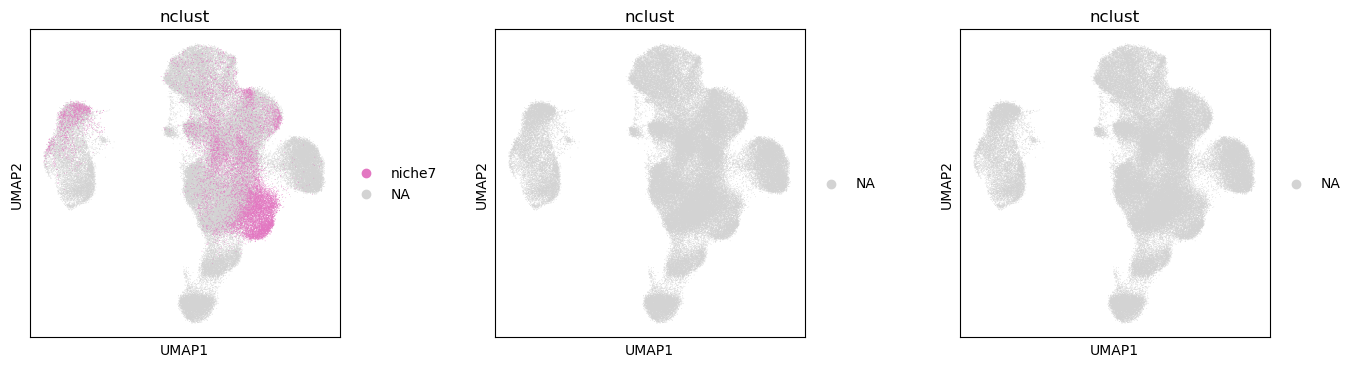

In [218]:
#adata_spatial_s = sc.read_h5ad("adata_spatial_s.h5ad")


ncols=3
nrows=1
figsize=4
wspace=0.5
fig,axs = plt.subplots(nrows=nrows, ncols=ncols,
                       figsize=(ncols*figsize+figsize*wspace*(ncols-1),nrows*figsize))
plt.subplots_adjust(wspace=wspace)
sc.pl.umap(
    adata_spatial_s, color=["nclust"], groups = ["niche7"], palette=sc.pl.palettes.default_20, ax=axs[0],show=False)
sc.pl.umap(
    adata_spatial_s, color=["nclust"], groups = ["niche8"], palette=sc.pl.palettes.default_20, ax=axs[1],show=False)
sc.pl.umap(
    adata_spatial_s, color=["nclust"], groups = ["niche9"], palette=sc.pl.palettes.default_20, ax=axs[2])



/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


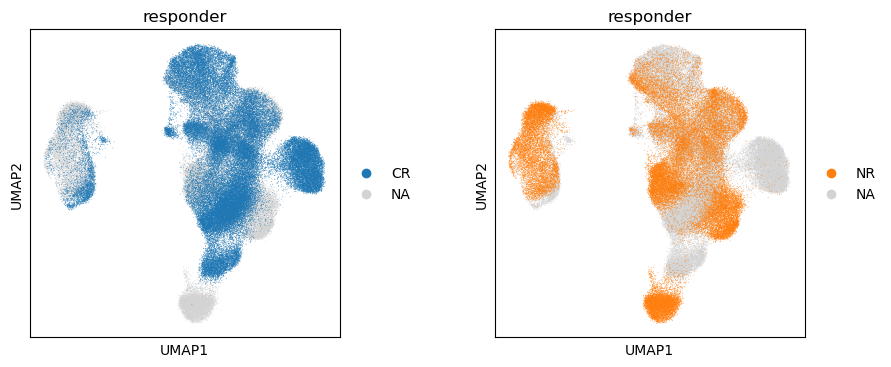

In [248]:
ncols=2
nrows=1
figsize=4
wspace=0.5
fig,axs = plt.subplots(nrows=nrows, ncols=ncols,
                       figsize=(ncols*figsize+figsize*wspace*(ncols-1),nrows*figsize))
plt.subplots_adjust(wspace=wspace)
sc.pl.umap(
    adata_spatial_s, color=["responder"], groups = ["CR"], palette=sc.pl.palettes.default_20, ax=axs[0],show=False)
sc.pl.umap(
    adata_spatial_s, color=["responder"], groups = ["NR"], palette=sc.pl.palettes.default_20, ax=axs[1])



In [308]:
adata_spatial_s.obs['new_clust'] = adata_spatial_s.obs['new_clust'].fillna(0)

TypeError: Cannot setitem on a Categorical with a new category (0), set the categories first

In [313]:
set(adata_spatial_s.obs['new_clust'])

{'B-cell',
 'NK',
 'T CD4 memory',
 'T CD4 naive',
 'T CD8 memory',
 'T CD8 naive',
 'a_basal_cells',
 'b_epithelial_cells',
 'c_basal_cells_PGR',
 'd_basal_cells_prolif',
 'e_basal_cells',
 'endothelial',
 'f_diff_str_sq_epithelia',
 'fibroblast',
 'mDC',
 'macrophage',
 'monocyte',
 nan,
 'pDC',
 'plasmablast'}

In [323]:

adata_spatial_s.obs['new_clust']  = adata_spatial_s.obs['new_clus'].replace(np.nan, 0)

In [325]:
adata_spatial_s.obs['new_clu']

KeyError: 'new_clu'

In [289]:
adata_spatial_s_2 = adata_spatial_s[adata_spatial_s.obs["library_id"] == "slide2"]
adata_spatial_s_3 = adata_spatial_s[adata_spatial_s.obs["library_id"] == "slide3"]
adata_spatial_s_4 = adata_spatial_s[adata_spatial_s.obs["library_id"] == "slide4"]

KeyError: 'Could not find key nclu in .var_names or .obs.columns.'

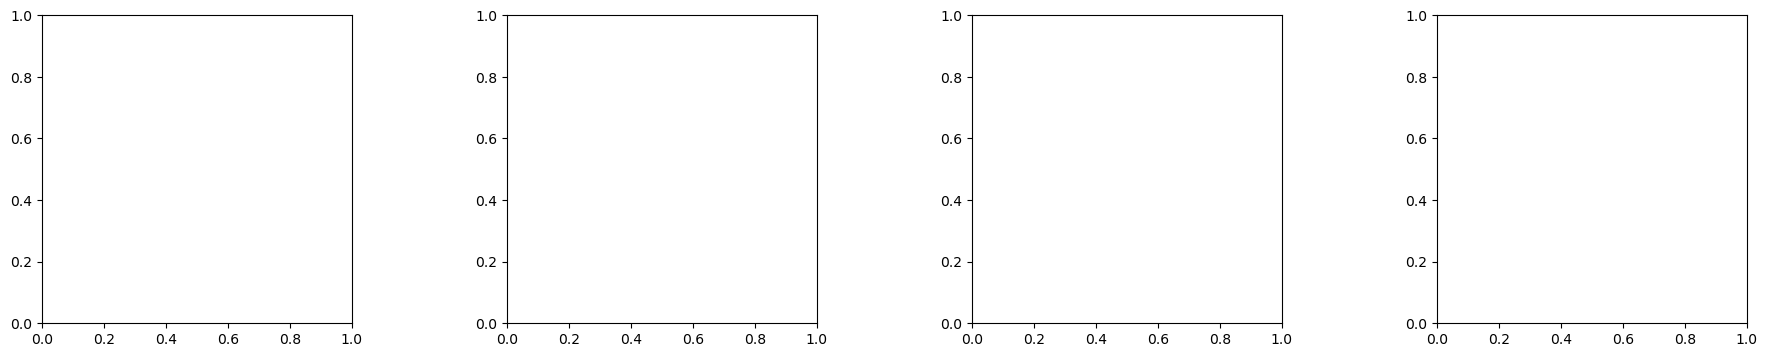

In [295]:
ncols=4
nrows=1
figsize=4
wspace=0.5
fig,axs = plt.subplots(nrows=nrows, ncols=ncols,
                       figsize=(ncols*figsize+figsize*wspace*(ncols-1),nrows*figsize))
plt.subplots_adjust(wspace=wspace)
sc.pl.umap(
    adata_spatial_s, color=["nclu"], groups = ["plasmablast"], palette=sc.pl.palettes.default_20, ax=axs[0],show=False)
sc.pl.umap(
    adata_spatial_s, color=["nclu"], groups = ["fibroblast"], palette=sc.pl.palettes.default_20, ax=axs[1],show=False)
sc.pl.umap(
    adata_spatial_s, color=["nclu"], groups = ["endothelial"], palette=sc.pl.palettes.default_20, ax=axs[2])


In [63]:
sc.pp.neighbors(adata_spatial_s, use_rep="X_scanorama")
sc.tl.umap(adata_spatial_s)
sc.tl.leiden(adata_spatial_s, key_added="clusters")

In [247]:
sc.tl.leiden(adata_spatial_s, key_added="clusters", resolution = 3)

In [249]:

import matplotlib.pyplot as plt
import seaborn as sns

def get_cluster_proportions(adata,
                            cluster_key="new_clu",
                            sample_key="library_id",
                            drop_values=None):
    """
    Input
    =====
    adata : AnnData object
    cluster_key : key of `adata.obs` storing cluster info
    sample_key : key of `adata.obs` storing sample/replicate info
    drop_values : list/iterable of possible values of `sample_key` that you don't want
    
    Returns
    =======
    pd.DataFrame with samples as the index and clusters as the columns and 0-100 floats
    as values
    """
    
    adata_tmp = adata.copy()
    sizes = adata_tmp.obs.groupby([cluster_key, sample_key]).size()
    props = sizes.groupby(level=1).apply(lambda x: 100 * x / x.sum()).reset_index() 
    props = props.pivot(columns=sample_key, index=cluster_key).T
    props.index = props.index.droplevel(0)
    props.fillna(0, inplace=True)
    
    if drop_values is not None:
        for drop_value in drop_values:
            props.drop(drop_value, axis=0, inplace=True)
    return props


def plot_cluster_proportions(cluster_props, 
                             cluster_palette=None,
                             xlabel_rotation=0): 
    fig, ax = plt.subplots(dpi=300)
    fig.patch.set_facecolor("white")
    
    cmap = None
    if cluster_palette is not None:
        cmap = sns.palettes.blend_palette(
            cluster_palette, 
            n_colors=len(cluster_palette), 
            as_cmap=True)
   
    cluster_props.plot(
        kind="bar", 
        stacked=True, 
        ax=ax, 
        legend=None, 
        colormap=cmap
    )
    
    ax.legend(bbox_to_anchor=(1.01, 1), frameon=False, title="Cluster")
    sns.despine(fig, ax)
    ax.tick_params(axis="x", rotation=xlabel_rotation)
    ax.set_xlabel(cluster_props.index.name.capitalize())
    ax.set_ylabel("Proportion")
    fig.tight_layout()
    
    return fig

In [239]:


    adata_tmp = adata_spatial_s.copy()
    sizes = adata_tmp.obs.groupby(["responder", "library_id"]).size()



In [240]:
sizes

responder  library_id
CR         slide2        17436
           slide3        34314
           slide4        13040
NR         slide2        22852
           slide3         8579
           slide4        12725
dtype: int64

In [242]:
sizes.groupby(level=1)

In [266]:
adata = adata_spatial_s.copy()


In [267]:
list(adata.obs)

['fov',
 'Area',
 'AspectRatio',
 'CenterX_global_px',
 'CenterY_global_px',
 'Width',
 'Height',
 'Mean.MembraneStain',
 'Max.MembraneStain',
 'Mean.PanCK',
 'Max.PanCK',
 'Mean.CD68',
 'Max.CD68',
 'Mean.CD3',
 'Max.CD3',
 'Mean.DAPI',
 'Max.DAPI',
 'cell_ID',
 'Idents',
 'n_genes_by_counts',
 'log1p_n_genes_by_counts',
 'total_counts',
 'log1p_total_counts',
 'pct_counts_in_top_50_genes',
 'pct_counts_in_top_100_genes',
 'pct_counts_in_top_200_genes',
 'pct_counts_in_top_500_genes',
 'total_counts_NegPrb',
 'log1p_total_counts_NegPrb',
 'pct_counts_NegPrb',
 'responder',
 'nb_clus',
 'library_id',
 'clusters',
 'new_clusters',
 'new_clus',
 'new_clust',
 'nclust']

In [397]:
#adata_spatial_s.obs['nclust']=adata_spatial_s.obs['nclust'].astype('category')
adata_spatial_s.obs['library_id']=adata_spatial_s.obs['library_id'].astype('category')
adata_spatial_s.obs['n_clust']=adata_spatial_s.obs['n_clust'].astype('category')


In [398]:
adata = adata_spatial_s.copy()

In [405]:
n_categories[adata_spatial_s.obs['n_clust']]

TypeError: unhashable type: 'Series'

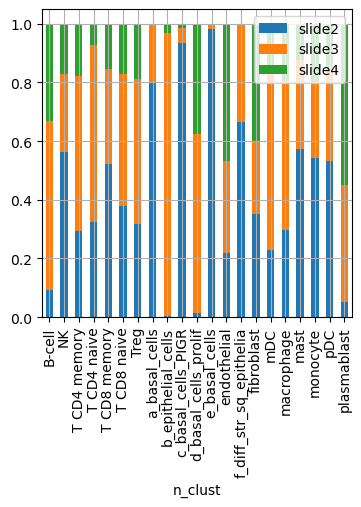

In [422]:
tmp = pd.crosstab(adata.obs['n_clust'],adata.obs['library_id'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='upper right')

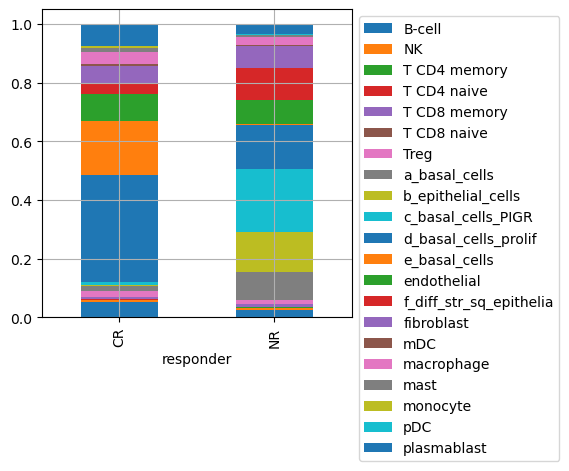

In [435]:
tmp = pd.crosstab(adata.obs['responder'],adata.obs['n_clust'], normalize='index')
tmp.plot.bar(stacked=True).legend(bbox_to_anchor=(1.0, 1.0))

KeyError: 'n_clust_colors'

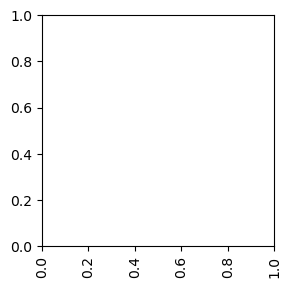

In [420]:
### CREATE A STACKED BAR PLOT
# Note: Need to specify observation colors in adata.uns for colors to work.

from copy import deepcopy

obs_1 = 'library_id'
obs_2 = 'n_clust'

n_categories = {x : len(adata.obs[x].cat.categories) for x in [obs_1, obs_2]}
df = adata.obs[[obs_2, obs_1]].values

obs2_clusters = adata.obs[obs_2].cat.categories.tolist()
obs1_clusters = adata.obs[obs_1].cat.categories.tolist()

obs1_to_obs2 = {k: np.zeros(len(obs2_clusters), dtype="i")
                   for k in obs1_clusters}
obs2_to_obs1 = {k: np.zeros(len(obs1_clusters), dtype="i")
                   for k in obs2_clusters}

for b, l in df:
  obs2_to_obs1[b][obs1_clusters.index(str(l))] += 1
  obs1_to_obs2[l][obs2_clusters.index(str(b))] += 1

obs2_to_obs1_array = np.zeros((len(obs2_clusters), len(obs1_clusters)))
obs1_to_obs2_array = np.zeros((len(obs1_clusters), len(obs2_clusters)))

for i, k in enumerate(obs2_clusters):
  obs2_to_obs1_array[i, :] = deepcopy(obs2_to_obs1[k])
for i, k in enumerate(obs1_clusters):
  obs1_to_obs2_array[i, :] = deepcopy(obs1_to_obs2[k])

sums = np.sum(obs2_to_obs1_array, 0)
for col in range(np.size(obs2_to_obs1_array, 1)):
  for row in range(np.size(obs2_to_obs1_array, 0)):
    obs2_to_obs1_array[row, col] = obs2_to_obs1_array[row, col] / sums[col]

sums2 = np.sum(obs1_to_obs2_array, 0)
for col in range(np.size(obs1_to_obs2_array, 1)):
  for row in range(np.size(obs1_to_obs2_array, 0)):
    obs1_to_obs2_array[row, col] = obs1_to_obs2_array[row, col] / sums2[col]

df_obs2 = pd.DataFrame(obs2_to_obs1_array)
df_obs2.head()

x = obs1_clusters
plt.figure(figsize=(3, 3))
plt.xticks(rotation=90)
plt.grid(False)

# stack bars
for i in range(n_categories[obs_2]):
  bot = 0.0
  color = adata.uns[obs_2 + '_colors'][0]
  for j in range(i):
    bot += df_obs2.iloc[j]
    color = adata.uns[obs_2 + '_colors'][i]
  plt.bar(x, df_obs2.iloc[i], bottom=bot, color=color, label=obs2_clusters[i])
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')
plt.savefig(savepath + '/' + obs_1 + '_stacked_barplot_color.pdf',
            transparent=True, bbox_inches='tight', pad_inches=0.02)

df_obs1 = pd.DataFrame(obs1_to_obs2_array)
df_obs1.head()

x = obs2_clusters
plt.figure(figsize=(3, 3))
plt.xticks(rotation=90)
plt.grid(False)

# stack bars
for i in range(n_categories[obs_1]):
  bot = 0.0
  color = adata.uns[obs_1 + '_colors'][0]
  for j in range(i):
    bot += df_obs1.iloc[j]
    color = adata.uns[obs_1 + '_colors'][i]
  plt.bar(x, df_obs1.iloc[i], bottom=bot, color=color,
          label=obs1_clusters[i])
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')
#plt.savefig(savepath + '/' + obs_2 + '_stacked_barplot.pdf',
#            transparent=True, bbox_inches='tight', pad_inches=0.02)

In [ ]:
    props = props.pivot(columns=sample_key, index=cluster_key).T
    props.index = props.index.droplevel(0)
    props.fillna(0, inplace=True)
    
    if drop_values is not None:
        for drop_value in drop_values:
            props.drop(drop_value, axis=0, inplace=True)
    return props

/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


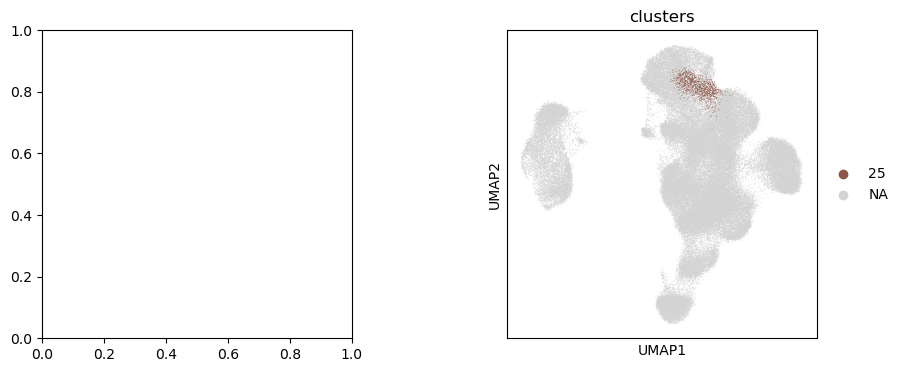

In [227]:
adata_spatial_s = sc.read_h5ad("adata_spatial_s.h5ad")


ncols=2
nrows=1
figsize=4
wspace=0.5
fig,axs = plt.subplots(nrows=nrows, ncols=ncols,
                       figsize=(ncols*figsize+figsize*wspace*(ncols-1),nrows*figsize))
plt.subplots_adjust(wspace=wspace)
sc.pl.umap(
    adata_spatial_s, color=["clusters"], groups=[ "25"], palette=sc.pl.palettes.default_20, ax=axs[1])
#sc.pl.umap(adata_spatial_s,color=[ "library_id"], groups=[ "slide2"], palette=sc.pl.palettes.default_20, ax=axs[0],show=False)

In [20]:
adata_spatial_s.obs

fov  Area  AspectRatio  CenterX_global_px  CenterY_global_px   
1_1-slide2       1  3467         1.10     -106239.857143       26280.333333  \
2_1-slide2       1  3122         1.27     -106192.857143       26284.333333   
3_1-slide2       1  1600         1.28     -106091.857143       26292.333333   
4_1-slide2       1  3546         0.80     -106060.857143       26271.333333   
5_1-slide2       1  3266         1.11     -105875.857143       26278.333333   
...             ..   ...          ...                ...                ...   
3681_10-slide4  10  2427         1.45     -293836.000000       17126.190476   
3682_10-slide4  10  1629         0.96     -295198.000000       17126.190476   
3683_10-slide4  10  2632         2.21     -292937.000000       17121.190476   
3687_10-slide4  10  1680         2.09     -293987.000000       17118.190476   
3688_10-slide4  10  1341         2.92     -293332.000000       17114.190476   

                Width  Height  Mean.MembraneStain  Max.MembraneStain   
1_1-slide2         75      68                 119                363  \
2_1-slide2         76      60                 109                420   
3_1-slide2         55      43                 126                403   
4_1-slide2         69      86                 161                544   
5_1-slide2         80      72                  90                347   
...               ...     ...                 ...                ...   
3681_10-slide4     71      49                 160               1224   
3682_10-slide4     46      48                 251                901   
3683_10-slide4     86      39                 316                930   
3687_10-slide4     69      33                 115                507   
3688_10-slide4     73      25                 149                463   

                Mean.PanCK  ...  total_counts_NegPrb   
1_1-slide2              74  ...                    0  \
2_1-slide2              78  ...                    0   
3_1-slide2              80  ...                    0   
4_1-slide2             110  ...                    0   
5_1-slide2              66  ...                    2   
...                    ...  ...                  ...   
3681_10-slide4         126  ...                    0   
3682_10-slide4         168  ...                    0   
3683_10-slide4         170  ...                    0   
3687_10-slide4         179  ...                    0   
3688_10-slide4         166  ...                    0   

                log1p_total_counts_NegPrb  pct_counts_NegPrb  responder   
1_1-slide2                       0.000000           0.000000         CR  \
2_1-slide2                       0.000000           0.000000         CR   
3_1-slide2                       0.000000           0.000000         CR   
4_1-slide2                       0.000000           0.000000         CR   
5_1-slide2                       1.098612           2.040816         CR   
...                                   ...                ...        ...   
3681_10-slide4                   0.000000           0.000000         CR   
3682_10-slide4                   0.000000           0.000000         CR   
3683_10-slide4                   0.000000           0.000000         CR   
3687_10-slide4                   0.000000           0.000000         CR   
3688_10-slide4                   0.000000           0.000000         CR   

                   nb_clus  library_id  clusters  new_clusters new_clus   
1_1-slide2               e      slide2         1             e      NaN  \
2_1-slide2               e      slide2         1             e      NaN   
3_1-slide2               e      slide2         6             e      NaN   
4_1-slide2               e      slide2         1             e      NaN   
5_1-slide2               e      slide2         5             e      NaN   
...                    ...         ...       ...           ...      ...   
3681_10-slide4           d      slide4        21             d      NaN   
3682_10-slide4           d 

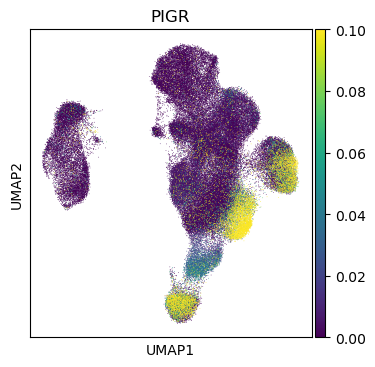

In [56]:
with rc_context({'figure.figsize': (4, 4)}):
    #sc.pl.umap(adata_spatial_s, color='PGR', vmin=0, vmax=0.2)
    sc.pl.umap(adata_spatial_s, color='PIGR', vmin=0, vmax=0.1)

In [14]:
adata_spatial_s.obs

fov  Area  AspectRatio  CenterX_global_px  CenterY_global_px   
1_1-slide2       1  3467         1.10     -106239.857143       26280.333333  \
2_1-slide2       1  3122         1.27     -106192.857143       26284.333333   
3_1-slide2       1  1600         1.28     -106091.857143       26292.333333   
4_1-slide2       1  3546         0.80     -106060.857143       26271.333333   
5_1-slide2       1  3266         1.11     -105875.857143       26278.333333   
...             ..   ...          ...                ...                ...   
3681_10-slide4  10  2427         1.45     -293836.000000       17126.190476   
3682_10-slide4  10  1629         0.96     -295198.000000       17126.190476   
3683_10-slide4  10  2632         2.21     -292937.000000       17121.190476   
3687_10-slide4  10  1680         2.09     -293987.000000       17118.190476   
3688_10-slide4  10  1341         2.92     -293332.000000       17114.190476   

                Width  Height  Mean.MembraneStain  Max.MembraneStain   
1_1-slide2         75      68                 119                363  \
2_1-slide2         76      60                 109                420   
3_1-slide2         55      43                 126                403   
4_1-slide2         69      86                 161                544   
5_1-slide2         80      72                  90                347   
...               ...     ...                 ...                ...   
3681_10-slide4     71      49                 160               1224   
3682_10-slide4     46      48                 251                901   
3683_10-slide4     86      39                 316                930   
3687_10-slide4     69      33                 115                507   
3688_10-slide4     73      25                 149                463   

                Mean.PanCK  ...  total_counts_NegPrb   
1_1-slide2              74  ...                    0  \
2_1-slide2              78  ...                    0   
3_1-slide2              80  ...                    0   
4_1-slide2             110  ...                    0   
5_1-slide2              66  ...                    2   
...                    ...  ...                  ...   
3681_10-slide4         126  ...                    0   
3682_10-slide4         168  ...                    0   
3683_10-slide4         170  ...                    0   
3687_10-slide4         179  ...                    0   
3688_10-slide4         166  ...                    0   

                log1p_total_counts_NegPrb  pct_counts_NegPrb  responder   
1_1-slide2                       0.000000           0.000000         CR  \
2_1-slide2                       0.000000           0.000000         CR   
3_1-slide2                       0.000000           0.000000         CR   
4_1-slide2                       0.000000           0.000000         CR   
5_1-slide2                       1.098612           2.040816         CR   
...                                   ...                ...        ...   
3681_10-slide4                   0.000000           0.000000         CR   
3682_10-slide4                   0.000000           0.000000         CR   
3683_10-slide4                   0.000000           0.000000         CR   
3687_10-slide4                   0.000000           0.000000         CR   
3688_10-slide4                   0.000000           0.000000         CR   

                   nb_clus  library_id  clusters  new_clusters new_clus   
1_1-slide2               e      slide2         1             e      NaN  \
2_1-slide2               e      slide2         1             e      NaN   
3_1-slide2               e      slide2         6             e      NaN   
4_1-slide2               e      slide2         1             e      NaN   
5_1-slide2               e      slide2         5             e      NaN   
...                    ...         ...       ...           ...      ...   
3681_10-slide4           d      slide4        21             d      NaN   
3682_10-slide4           d 

axes: Axes(0.125,0.11;0.775x0.77)


/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


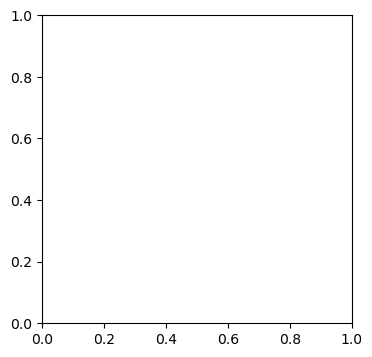

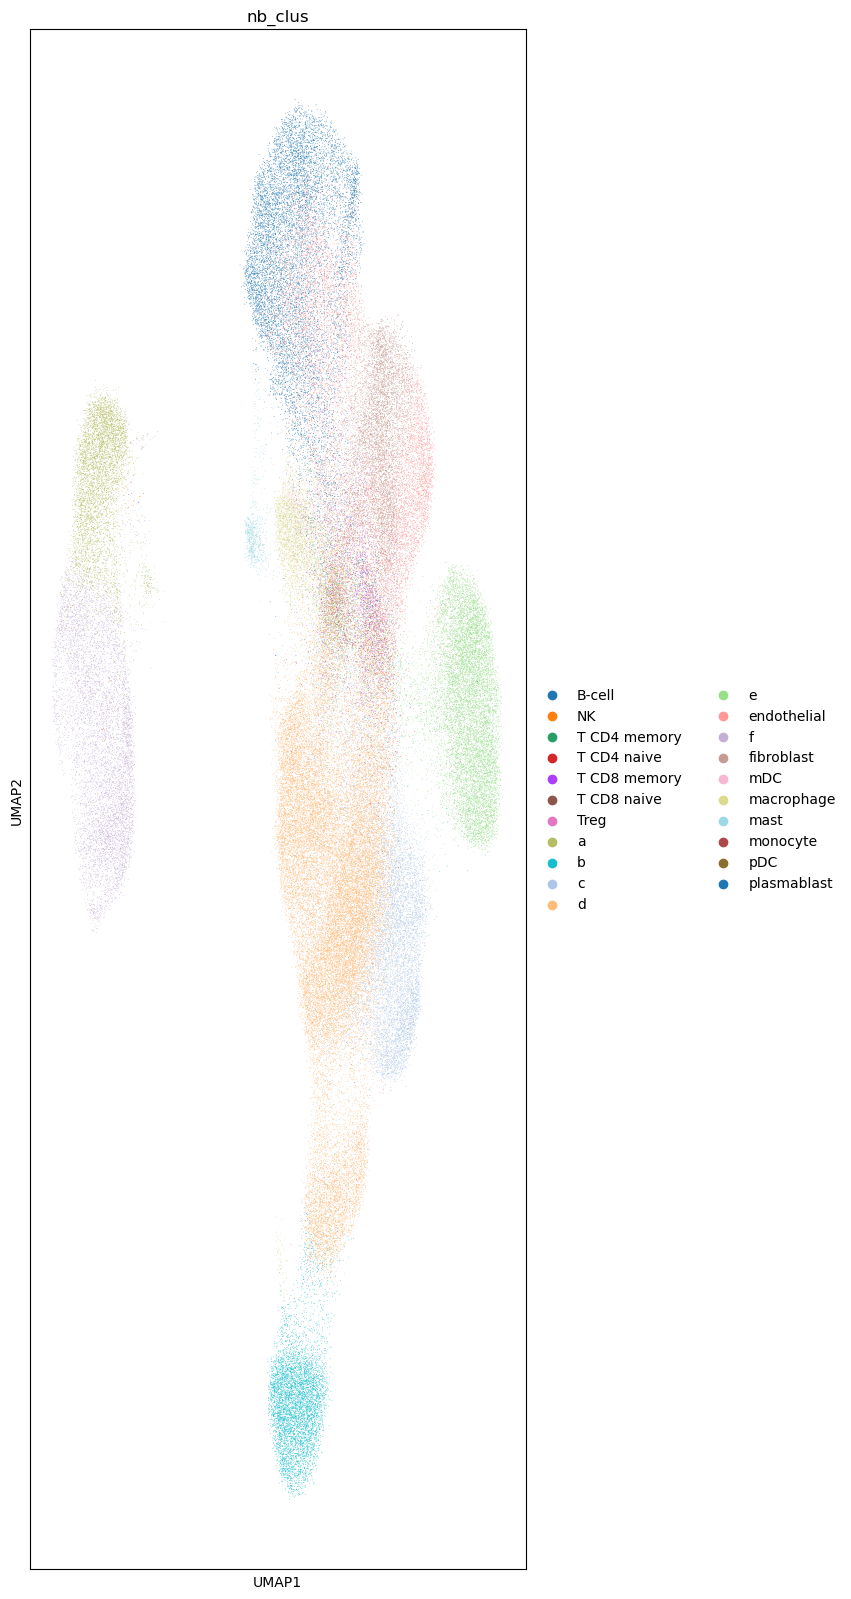

In [191]:
ncols=1
nrows=1
figsize=4
wspace=0.5
fig,axs = plt.subplots(nrows=nrows, ncols=ncols,
                       figsize=(ncols*figsize+figsize*wspace*(ncols-1),nrows*figsize))
plt.subplots_adjust(wspace=wspace)
# This produces two Axes objects in a single Figure
print('axes:',axs)

sc.pl.umap(
    adata_spatial_s, color=["nb_clus"], palette=sc.pl.palettes.default_20)


axes: [<Axes: > <Axes: >]


/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


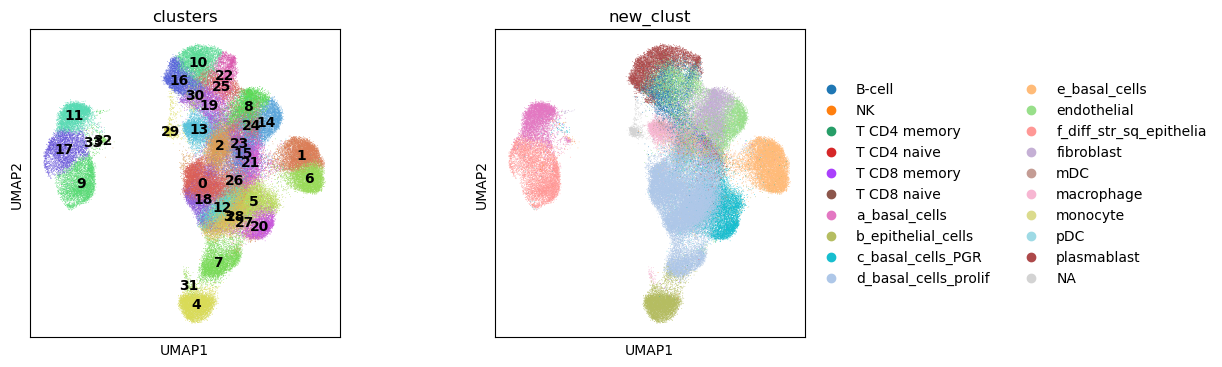

In [327]:
ncols=2
nrows=1
figsize=4
wspace=0.5
fig,axs = plt.subplots(nrows=nrows, ncols=ncols,
                       figsize=(ncols*figsize+figsize*wspace*(ncols-1),nrows*figsize))
plt.subplots_adjust(wspace=wspace)
# This produces two Axes objects in a single Figure
print('axes:',axs)

sc.pl.umap(
    adata_spatial_s, color=["clusters"], palette=sns.color_palette("hls", 25), ax=axs[0],show=False, legend_loc="on data")

sc.pl.umap(
    adata_spatial_s, color=["new_clust"], palette=sc.pl.palettes.default_20, ax=axs[1])

In [ ]:
old_to_new = dict(
    11='a_basal_cells',
    17='f_diff_str_sq_epithelia',
    32='a_basal_cells',
    33='a_basal_cells',
    9='f_diff_str_sq_epithelia',
    10='B-cell',
    22='B-cell',
    16='B-cell',
    30='B-cell',
    4='b_epithelial_cells',
    1='e_basal_cells',
    6='e_basal_cells',
    13='macrophages',
    5='c_basal_cells_PGR',
    20='c_basal_cells_PGR',
    7='d_basal_cells_prolif',
    12='d_basal_cells_prolif',
    27='d_basal_cells_prolif',
    28='d_basal_cells_prolif',
    18='d_basal_cells_prolif',
    0='d_basal_cells_prolif',
    26='d_basal_cells_prolif',
    
)
adata.obs['new_clusters'] = (
    adata.obs['old_clusters']
    .map(old_to_new)
    .astype('category')
)

In [64]:
old_to_new = {
    '25' : 'fibroblast' 
}


adata_spatial_s.obs['new_clust'] = adata_spatial_s.obs['clusters'].map(old_to_new).fillna('Other')

In [306]:
set(adata_spatial_s.obs['new_clust'] )

{'B-cell',
 'NK',
 'T CD4 memory',
 'T CD4 naive',
 'T CD8 memory',
 'T CD8 naive',
 'a_basal_cells',
 'b_epithelial_cells',
 'c_basal_cells_PGR',
 'd_basal_cells_prolif',
 'e_basal_cells',
 'endothelial',
 'f_diff_str_sq_epithelia',
 'fibroblast',
 'mDC',
 'macrophage',
 'monocyte',
 nan,
 'pDC',
 'plasmablast'}

In [268]:
list(set(adata_spatial_s.obs["nb_clus"]))

['Treg',
 'endothelial',
 'a',
 'T CD4 memory',
 'T CD8 memory',
 'd',
 'mDC',
 'macrophage',
 'c',
 'B-cell',
 'fibroblast',
 'f',
 'pDC',
 'T CD4 naive',
 'b',
 'monocyte',
 'plasmablast',
 'T CD8 naive',
 'NK',
 'e',
 'mast']

In [292]:
adata_spatial_s.obs["new_clusters"] = adata_spatial_s.obs["nb_clus"]

In [302]:
set(adata_spatial_s.obs["nb_clus"])

{'B-cell',
 'NK',
 'T CD4 memory',
 'T CD4 naive',
 'T CD8 memory',
 'T CD8 naive',
 'Treg',
 'a',
 'b',
 'c',
 'd',
 'e',
 'endothelial',
 'f',
 'fibroblast',
 'mDC',
 'macrophage',
 'mast',
 'monocyte',
 'pDC',
 'plasmablast'}

In [107]:
adata_spatial_s = sc.read_h5ad("adata_spatial_s.h5ad")

In [330]:
adata_spatial_s.drop(['new_clu'], axis=1)

AttributeError: 'AnnData' object has no attribute 'drop'

In [391]:
adata_spatial_s = sc.read_h5ad("adata_spatial_s.h5ad")

adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'a', 'n_clust'] = 'a_basal_cells'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'b', 'n_clust'] = 'b_epithelial_cells'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'c', 'n_clust'] = 'c_basal_cells_PIGR'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'd', 'n_clust'] = 'd_basal_cells_prolif'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'e', 'n_clust'] = 'e_basal_cells'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'f', 'n_clust'] = 'f_diff_str_sq_epithelia'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'macrophage', 'n_clust'] = 'macrophage'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'endothelial', 'n_clust'] = 'endothelial'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'B-cell', 'n_clust'] = 'B-cell'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'NK', 'n_clust'] = 'NK'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'monocyte', 'n_clust'] = 'monocyte'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'plasmablast', 'n_clust'] = 'plasmablast'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'fibroblast', 'n_clust'] = 'fibroblast'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'mDC', 'n_clust'] = 'mDC'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'pDC', 'n_clust'] = 'pDC'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'T CD4 naive', 'n_clust'] = 'T CD4 naive'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'T CD8 naive', 'n_clust'] = 'T CD8 naive'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'T CD4 memory', 'n_clust'] = 'T CD4 memory'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'T CD8 memory', 'n_clust'] = 'T CD8 memory'
adata_spatial_s.obs.loc[adata_spatial_s.obs['clusters'] == '25', 'new_cl'] = 'fibroblast'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'mast', 'n_clust'] = 'mast'
adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'Treg', 'n_clust'] = 'Treg'

In [357]:
#adata_spatial_s.obs['new_clust']  = adata_spatial_s.obs['new_clust'].cat.add_categories('mast')
#adata_spatial_s.obs['new_clust']  = adata_spatial_s.obs['new_clust'].cat.add_categories('Treg')

#adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'mast', 'new_clust'] = 'mast'
#adata_spatial_s.obs.loc[adata_spatial_s.obs['nb_clus'] == 'Treg', 'new_clust'] = 'Treg'

ValueError: new categories must not include old categories: {'mast'}

In [392]:
set(adata_spatial_s.obs['n_clust'])

{'B-cell',
 'NK',
 'T CD4 memory',
 'T CD4 naive',
 'T CD8 memory',
 'T CD8 naive',
 'Treg',
 'a_basal_cells',
 'b_epithelial_cells',
 'c_basal_cells_PIGR',
 'd_basal_cells_prolif',
 'e_basal_cells',
 'endothelial',
 'f_diff_str_sq_epithelia',
 'fibroblast',
 'mDC',
 'macrophage',
 'mast',
 'monocyte',
 'pDC',
 'plasmablast'}

In [393]:
adata_spatial_s.obs['n_clust'].isnull().sum()

0

In [104]:
adata_spatial_s.obs.columns

Index(['fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px',
       'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain',
       'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.CD3',
       'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'Idents',
       'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_NegPrb',
       'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'responder',
       'nb_clus', 'library_id', 'clusters', 'new_clusters', 'new_clus',
       'new_clust'],
      dtype='object')

/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


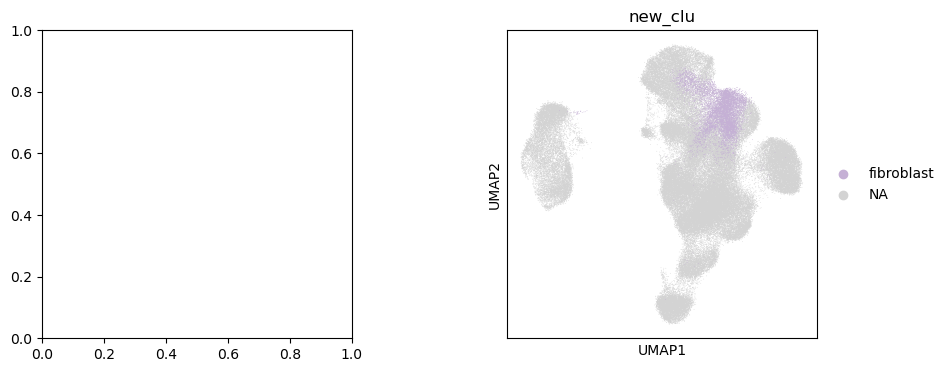

In [116]:
ncols=2
nrows=1
figsize=4
wspace=0.5
fig,axs = plt.subplots(nrows=nrows, ncols=ncols,
                       figsize=(ncols*figsize+figsize*wspace*(ncols-1),nrows*figsize))
plt.subplots_adjust(wspace=wspace)
sc.pl.umap(
    adata_spatial_s, color=["new_clu"], groups=["fibroblast"], palette=sc.pl.palettes.default_20, ax=axs[1])
#sc.pl.umap(adata_spatial_s,color=[ "library_id"], groups=[ "slide2"], palette=sc.pl.palettes.default_20, ax=axs[0],show=False)

axes: [<Axes: > <Axes: >]


/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


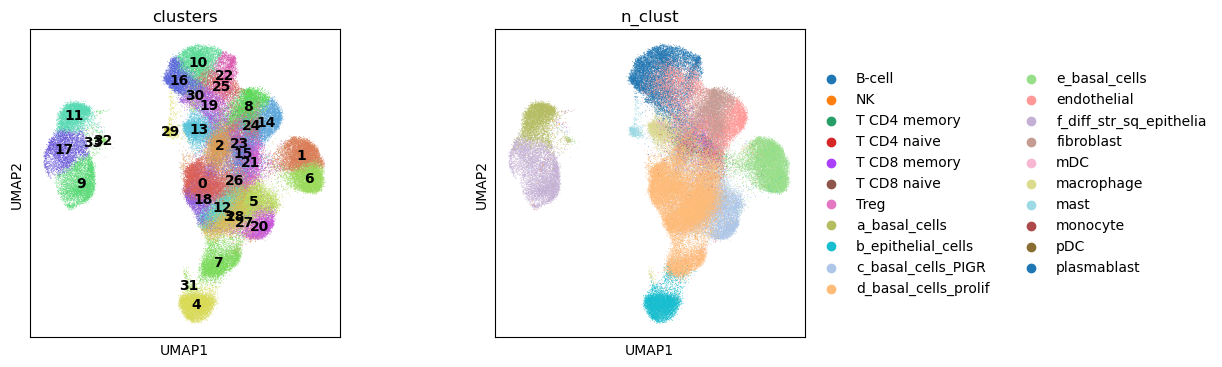

In [408]:
ncols=2
nrows=1
figsize=4
wspace=0.5
fig,axs = plt.subplots(nrows=nrows, ncols=ncols,
                       figsize=(ncols*figsize+figsize*wspace*(ncols-1),nrows*figsize))
plt.subplots_adjust(wspace=wspace)
# This produces two Axes objects in a single Figure
print('axes:',axs)

sc.pl.umap(
    adata_spatial_s, color=["clusters"], palette=sns.color_palette("hls", 25), ax=axs[0],show=False, legend_loc="on data")

sc.pl.umap(
    adata_spatial_s, color=["n_clust"], palette=sc.pl.palettes.default_20, ax=axs[1])

In [71]:
adata_spatial_s.obs['new_clust']

1_1-slide2        Other
2_1-slide2        Other
3_1-slide2        Other
4_1-slide2        Other
5_1-slide2        Other
                  ...  
3681_10-slide4    Other
3682_10-slide4    Other
3683_10-slide4    Other
3687_10-slide4    Other
3688_10-slide4    Other
Name: new_clust, Length: 108946, dtype: object

/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


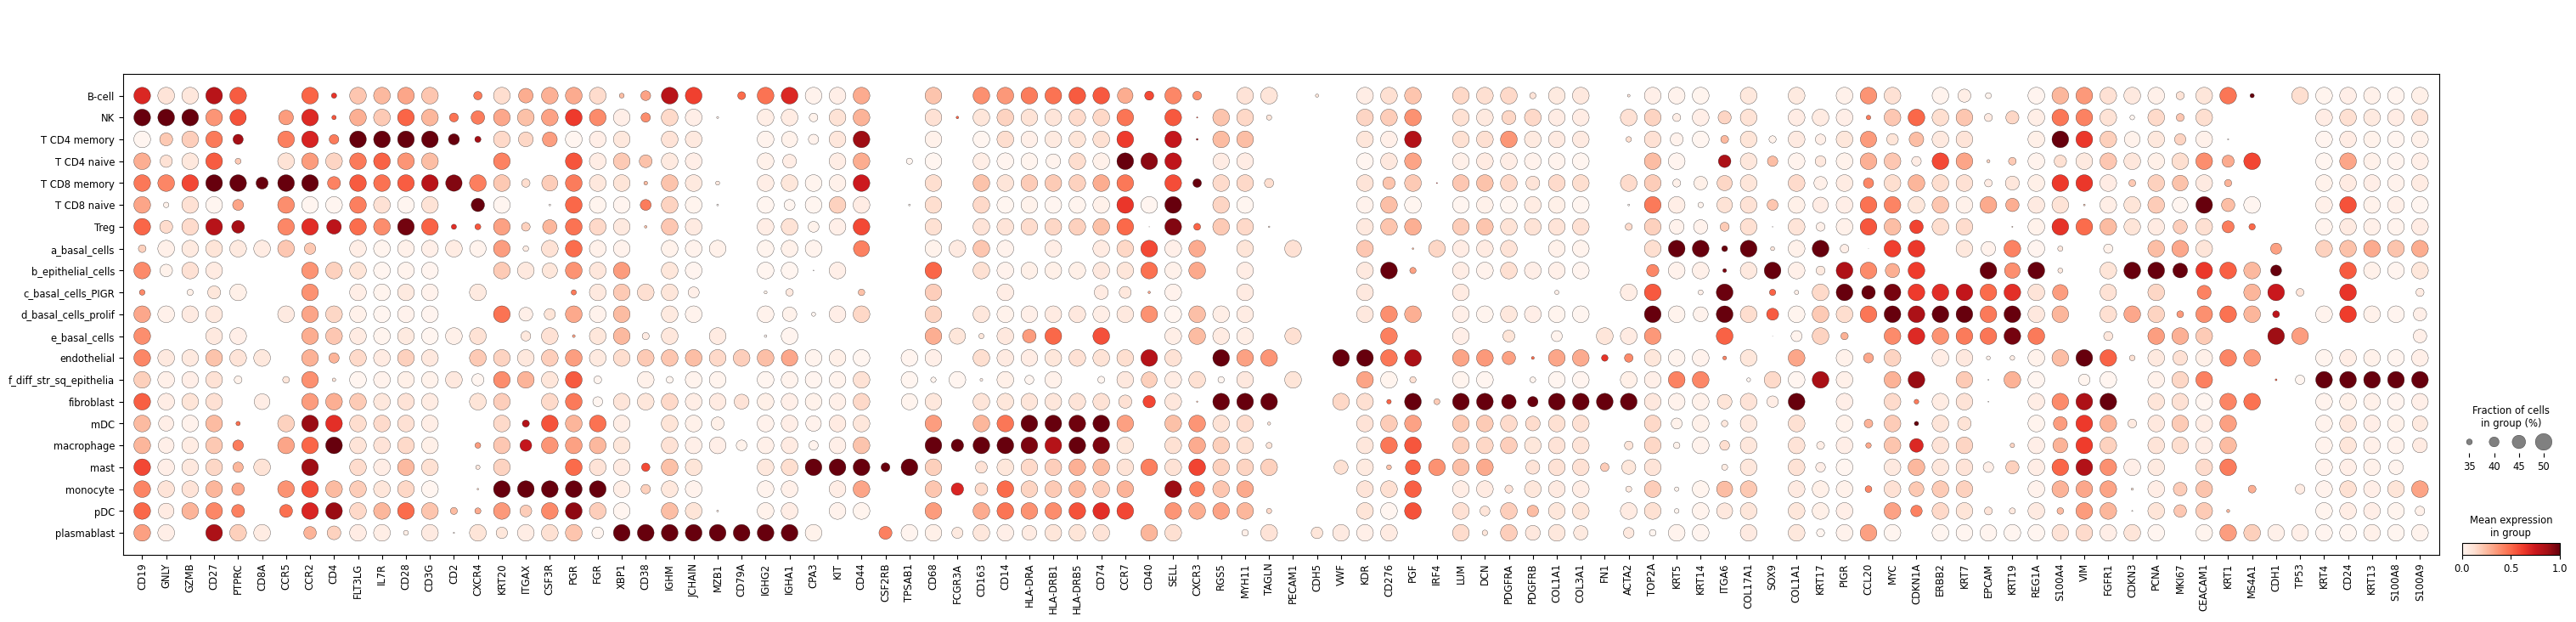

In [364]:
marker_genes = ['CD19','GNLY','GZMB',
                'CD27', 'PTPRC','CD8A','CCR5',
                'CCR2','CD4',
                'FLT3LG','IL7R','CD28','CD3G','CD2','CXCR4',
                'KRT20','ITGAX','CSF3R','PGR','FGR',
                'XBP1','CD38','IGHM','JCHAIN', 'MZB1','CD79A','IGHG2','IGHA1',
                'CPA3','KIT','CD44','CSF2RB','TPSAB1',
                'CD68', 'FCGR3A', 'CD163', 'CD14', 'HLA-DRA','HLA-DRB1', 'HLA-DRB5','CD74',
                'CCR7', 'CD40','SELL',
                'CXCR3', 'RGS5', 'MYH11', 'TAGLN', 'PECAM1','CDH5',
                'VWF','KDR','CD276','PGF','IRF4', 
                'LUM','DCN','PDGFRA', 'PDGFRB','COL1A1','COL3A1','FN1','ACTA2',
                'TOP2A', 'KRT5','KRT14','ITGA6', 'COL17A1', 'SOX9', 'COL1A1','KRT17', 'PIGR', 'CCL20',  'MYC','CDKN1A','ERBB2','KRT7','EPCAM','KRT19',
                'REG1A','S100A4', 'VIM',
                'FGFR1','CDKN3','PCNA','MKI67','CEACAM1','KRT1', 'MS4A1','CDH1','TP53','KRT4', 'CD24', 'KRT13','S100A8','S100A9']

ax = sc.pl.dotplot(adata_spatial_s, marker_genes, groupby='n_clust', dendrogram=False, dot_max=0.5, dot_min=0.3, standard_scale='var')




In [139]:
marker_genes = ['CD19','GNLY','GZMB',
                'CD27', 'PTPRC','CD8A','CCR5',
                'CCR2','CD4',
                'FLT3LG','IL7R','CD28','CD3G','CD2','CXCR4',
                'KRT20','ITGAX','CSF3R','PGR','FGR',
                'XBP1','CD38','IGHM','JCHAIN', 'MZB1','CD79A','IGHG2','IGHA1',
                'CPA3','KIT','CD44','CSF2RB','TPSAB1',
                'CD68', 'FCGR3A', 'CD163', 'CD14', 'HLA-DRA','HLA-DRB1', 'HLA-DRB5','CD74',
                'CCR7', 'CD40','SELL',
                'CXCR3', 'RGS5', 'MYH11', 'TAGLN', 'PECAM1','CDH5',
                'VWF','KDR','CD276','PGF','IRF4', 
                'LUM','DCN','PDGFRA', 'PDGFRB','COL1A1','COL3A1','FN1','ACTA2',
                'TOP2A', 'KRT5','KRT14','ITGA6', 'COL17A1', 'SOX9', 'COL1A1','KRT17', 'PIGR', 'CCL20',  'MYC','CDKN1A','ERBB2','KRT7','EPCAM','KRT19',
                'REG1A','S100A4', 'VIM',
                'FGFR1','CDKN3','PCNA','MKI67','CEACAM1','KRT1', 'MS4A1','CDH1','TP53','KRT4', 'CD24', 'KRT13','S100A8','S100A9']





In [134]:
marker_genes = ['ACTA2',
 'CCL20',
 'CCR2',
 'CCR5',
 'CCR7',
 'CD14',
 'CD163',
 'CD19',
 'CD2',
 'CD24',
 'CD27',
 'CD276',
 'CD28',
 'CD38',
 'CD3G',
 'CD4',
 'CD40',
 'CD44',
 'CD68',
 'CD74',
 'CD79A',
 'CD8A',
 'CDH1',
 'CDH5',
 'CDKN1A',
 'CDKN3',
 'CEACAM1',
 'COL17A1',
 'COL1A1',
 'COL3A1',
 'CPA3',
 'CSF2RB',
 'CSF3R',
 'CXCR3',
 'CXCR4',
 'DCN',
 'EPCAM',
 'ERBB2',
 'FCGR3A',
 'FGFR1',
 'FGR',
 'FLT3LG',
 'FN1',
 'GNLY',
 'GZMB',
 'HLA-DRA',
 'HLA-DRB1',
 'HLA-DRB5',
 'IGHA1',
 'IGHG2',
 'IGHM',
 'IL7R',
 'IRF4',
 'ITGA6',
 'ITGAX',
 'JCHAIN',
 'KDR',
 'KIT',
 'KRT1',
 'KRT13',
 'KRT14',
 'KRT17',
 'KRT19',
 'KRT20',
 'KRT4',
 'KRT5',
 'KRT7',
 'LUM',
 'MKI67',
 'MS4A1',
 'MYC',
 'MYH11',
 'MZB1',
 'PCNA',
 'PDGFRA',
 'PDGFRB',
 'PECAM1',
 'PGF',
 'PGR',
 'PIGR',
 'PTPRC',
 'REG1A',
 'RGS5',
 'S100A4',
 'S100A8',
 'S100A9',
 'SELL',
 'SOX9',
 'TAGLN',
 'TOP2A',
 'TP53',
 'TPSAB1',
 'VIM',
 'VWF',
 'XBP1']

In [135]:
marker_genes

['ACTA2',
 'CCL20',
 'CCR2',
 'CCR5',
 'CCR7',
 'CD14',
 'CD163',
 'CD19',
 'CD2',
 'CD24',
 'CD27',
 'CD276',
 'CD28',
 'CD38',
 'CD3G',
 'CD4',
 'CD40',
 'CD44',
 'CD68',
 'CD74',
 'CD79A',
 'CD8A',
 'CDH1',
 'CDH5',
 'CDKN1A',
 'CDKN3',
 'CEACAM1',
 'COL17A1',
 'COL1A1',
 'COL3A1',
 'CPA3',
 'CSF2RB',
 'CSF3R',
 'CXCR3',
 'CXCR4',
 'DCN',
 'EPCAM',
 'ERBB2',
 'FCGR3A',
 'FGFR1',
 'FGR',
 'FLT3LG',
 'FN1',
 'GNLY',
 'GZMB',
 'HLA-DRA',
 'HLA-DRB1',
 'HLA-DRB5',
 'IGHA1',
 'IGHG2',
 'IGHM',
 'IL7R',
 'IRF4',
 'ITGA6',
 'ITGAX',
 'JCHAIN',
 'KDR',
 'KIT',
 'KRT1',
 'KRT13',
 'KRT14',
 'KRT17',
 'KRT19',
 'KRT20',
 'KRT4',
 'KRT5',
 'KRT7',
 'LUM',
 'MKI67',
 'MS4A1',
 'MYC',
 'MYH11',
 'MZB1',
 'PCNA',
 'PDGFRA',
 'PDGFRB',
 'PECAM1',
 'PGF',
 'PGR',
 'PIGR',
 'PTPRC',
 'REG1A',
 'RGS5',
 'S100A4',
 'S100A8',
 'S100A9',
 'SELL',
 'SOX9',
 'TAGLN',
 'TOP2A',
 'TP53',
 'TPSAB1',
 'VIM',
 'VWF',
 'XBP1']

/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


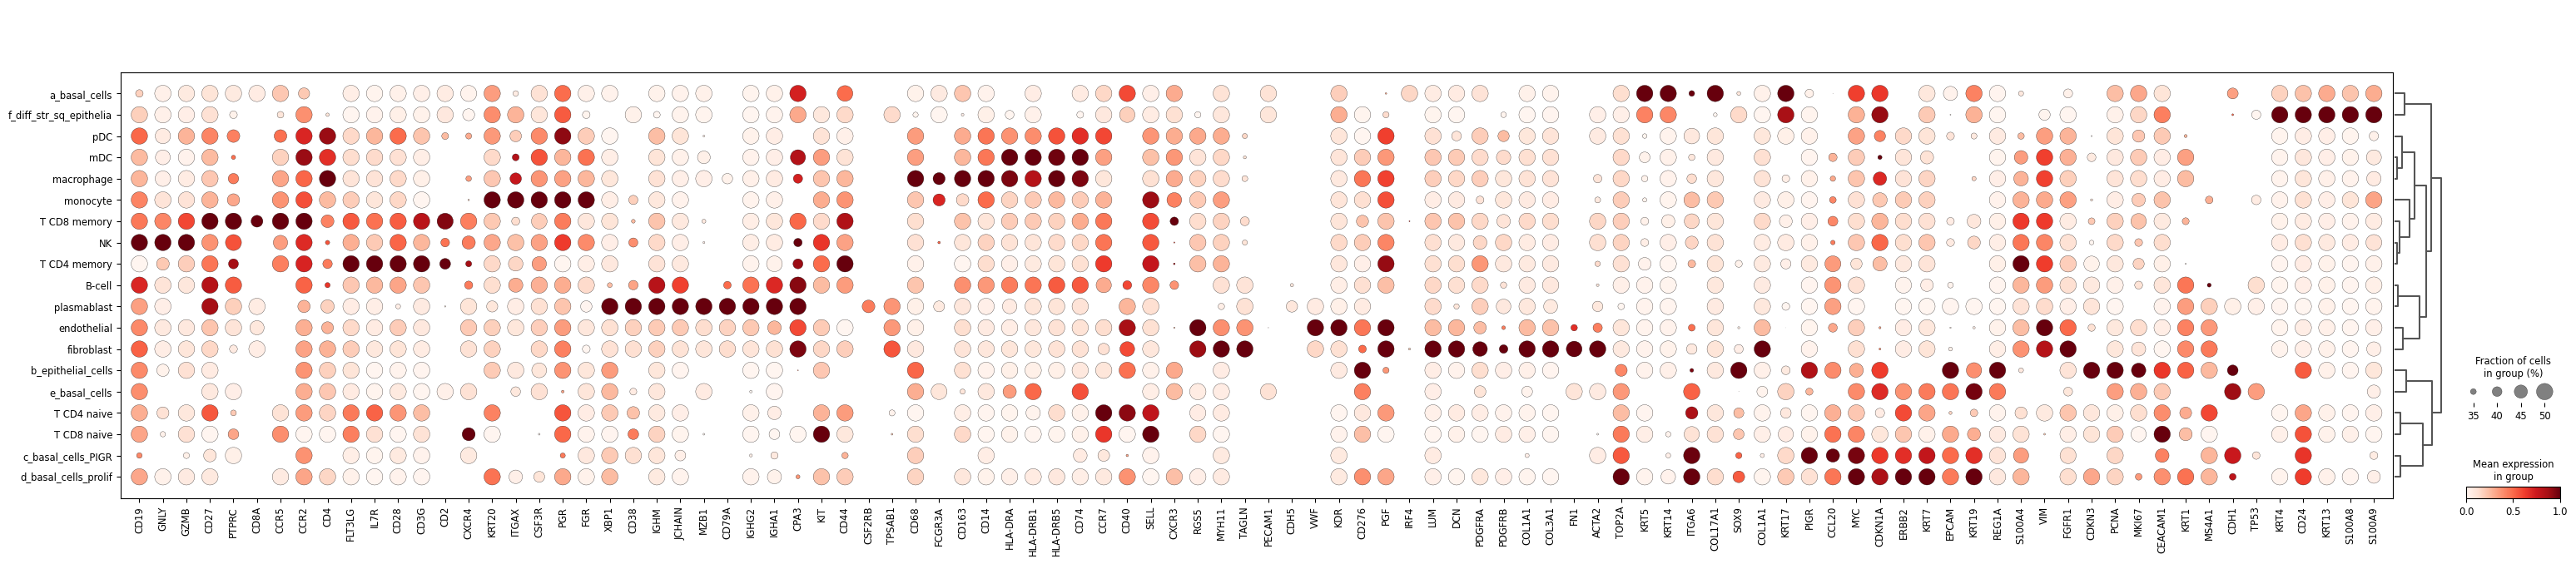

In [140]:
ax = sc.pl.dotplot(adata_spatial_s, marker_genes, groupby='new_clu', dendrogram=True, dot_max=0.5, dot_min=0.3, standard_scale='var')


KeyError: nan

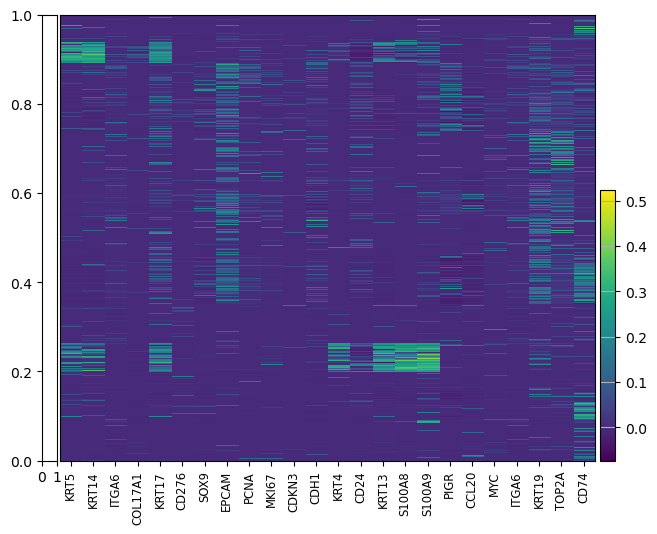

In [343]:


marker_genes_dict = {'a_basal_cells' : ['KRT5','KRT14','ITGA6', 'COL17A1','KRT17'],
'b_epithelial_cells': ['CD276', 'SOX9', 'EPCAM', 'PCNA','MKI67','CDKN3', 'CDH1'],
'f_diff_str_sq_epithelia': ['KRT4', 'CD24', 'KRT13','S100A8','S100A9'],
'c_basal_cells_PGR': ['PIGR', 'CCL20', 'MYC', 'ITGA6'],
'd_basal_cells_prolif': ['KRT19', 'TOP2A'],
'e_basal_cells': ['CD74']}


axs = sc.pl.heatmap(adata_spatial_s, marker_genes_dict, groupby='new_clust')


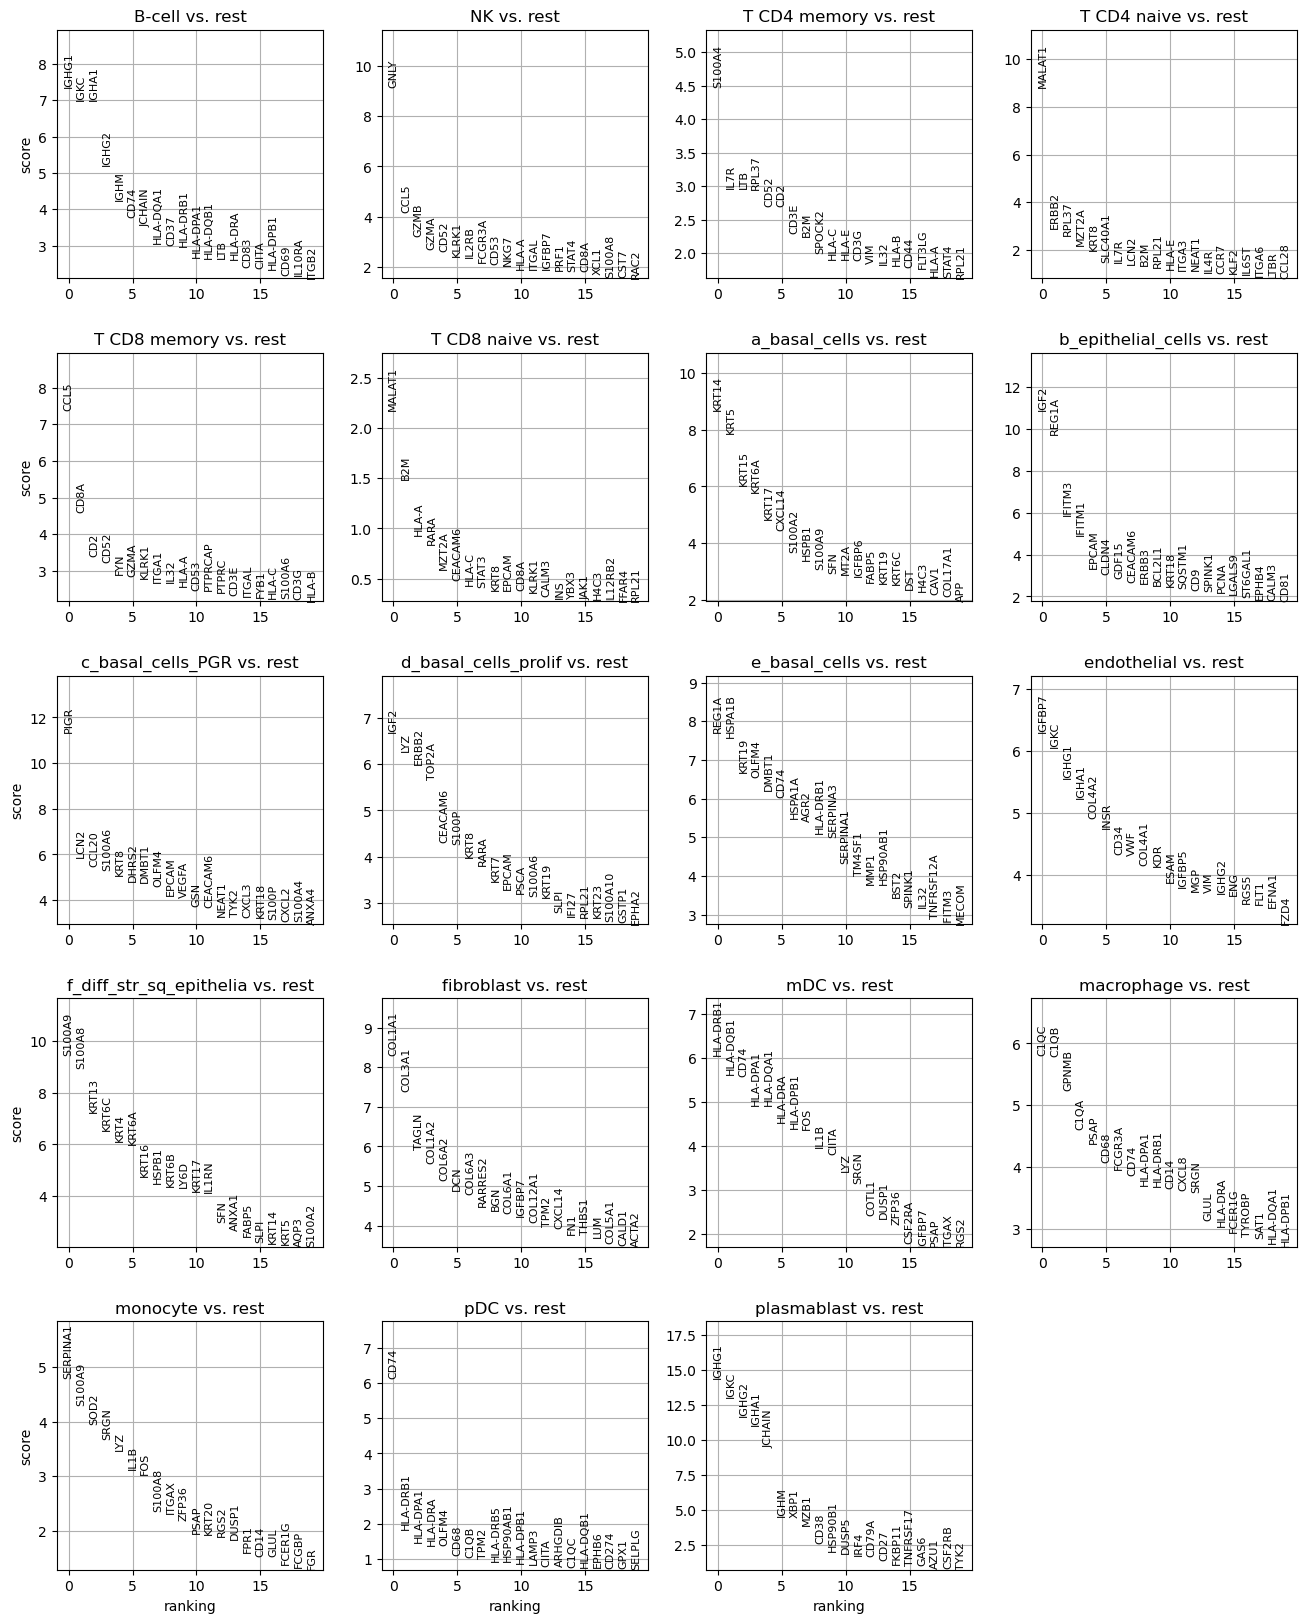

In [387]:
#https://nbisweden.github.io/workshop-scRNAseq/labs/compiled/scanpy/scanpy_05_dge.html
#sc.tl.rank_genes_groups(adata_spatial_s, 'n_clust', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata_spatial_s, n_genes=20, sharey=False, method='wilcoxon', groupby='n_clust')

In [157]:
adata_spatial_s.obs["new_clu_resp"] = adata_spatial_s.obs['new_clu'].astype(str) +"_"+ adata_spatial_s.obs["responder"].astype(str)

In [158]:
adata_spatial_s.obs["new_clu_resp"]

1_1-slide2               e_basal_cells_CR
2_1-slide2               e_basal_cells_CR
3_1-slide2               e_basal_cells_CR
4_1-slide2               e_basal_cells_CR
5_1-slide2               e_basal_cells_CR
                           ...           
3681_10-slide4    d_basal_cells_prolif_CR
3682_10-slide4    d_basal_cells_prolif_CR
3683_10-slide4    d_basal_cells_prolif_CR
3687_10-slide4    d_basal_cells_prolif_CR
3688_10-slide4              macrophage_CR
Name: new_clu_resp, Length: 108946, dtype: object

In [163]:
adata_spatial_s.uns['log1p']

{}

In [161]:
sc.tl.rank_genes_groups(adata_spatial_s, 'new_clu_resp', groups=['e_basal_cells_CR'], reference='e_basal_cells_NR', method='wilcoxon')


KeyError: 'base'

In [143]:
adata_spatial_s.obs

fov  Area  AspectRatio  CenterX_global_px  CenterY_global_px   
1_1-slide2       1  3467         1.10     -106239.857143       26280.333333  \
2_1-slide2       1  3122         1.27     -106192.857143       26284.333333   
3_1-slide2       1  1600         1.28     -106091.857143       26292.333333   
4_1-slide2       1  3546         0.80     -106060.857143       26271.333333   
5_1-slide2       1  3266         1.11     -105875.857143       26278.333333   
...             ..   ...          ...                ...                ...   
3681_10-slide4  10  2427         1.45     -293836.000000       17126.190476   
3682_10-slide4  10  1629         0.96     -295198.000000       17126.190476   
3683_10-slide4  10  2632         2.21     -292937.000000       17121.190476   
3687_10-slide4  10  1680         2.09     -293987.000000       17118.190476   
3688_10-slide4  10  1341         2.92     -293332.000000       17114.190476   

                Width  Height  Mean.MembraneStain  Max.MembraneStain   
1_1-slide2         75      68                 119                363  \
2_1-slide2         76      60                 109                420   
3_1-slide2         55      43                 126                403   
4_1-slide2         69      86                 161                544   
5_1-slide2         80      72                  90                347   
...               ...     ...                 ...                ...   
3681_10-slide4     71      49                 160               1224   
3682_10-slide4     46      48                 251                901   
3683_10-slide4     86      39                 316                930   
3687_10-slide4     69      33                 115                507   
3688_10-slide4     73      25                 149                463   

                Mean.PanCK  ...  log1p_total_counts_NegPrb  pct_counts_NegPrb   
1_1-slide2              74  ...                   0.000000           0.000000  \
2_1-slide2              78  ...                   0.000000           0.000000   
3_1-slide2              80  ...                   0.000000           0.000000   
4_1-slide2             110  ...                   0.000000           0.000000   
5_1-slide2              66  ...                   1.098612           2.040816   
...                    ...  ...                        ...                ...   
3681_10-slide4         126  ...                   0.000000           0.000000   
3682_10-slide4         168  ...                   0.000000           0.000000   
3683_10-slide4         170  ...                   0.000000           0.000000   
3687_10-slide4         179  ...                   0.000000           0.000000   
3688_10-slide4         166  ...                   0.000000           0.000000   

                responder     nb_clus  library_id  clusters  new_clusters   
1_1-slide2             CR           e      slide2         1             e  \
2_1-slide2             CR           e      slide2         1             e   
3_1-slide2             CR           e      slide2         6             e   
4_1-slide2             CR           e      slide2         1             e   
5_1-slide2             CR           e      slide2         5             e   
...                   ...         ...         ...       ...           ...   
3681_10-slide4         CR           d      slide4        21             d   
3682_10-slide4         CR           d      slide4         7             d   
3683_10-slide4         CR           d      slide4         7             d   
3687_10-slide4         CR           d      slide4         7             d   
3688_10-slide4         CR  macrophage      slide4         2    macrophage   

                new_clus             new_clust               new_clu  
1_1-slide2           NaN         e_basal_cells         e_basal_cells  
2_1-slide2           NaN         e_basal_cells         e_basal_cells  
3_1-slide2           NaN         e_basal_cells         e_basal_cells  
4_1-slide2         

In [385]:
sc.tl.rank_genes_groups(adata_spatial_s, 'n_clust', method='t-test', key_added = "t-test")
#sc.pl.rank_genes_groups(adata_spatial_s, n_genes=20, sharey=False, key = "t-test")

KeyError: 'base'

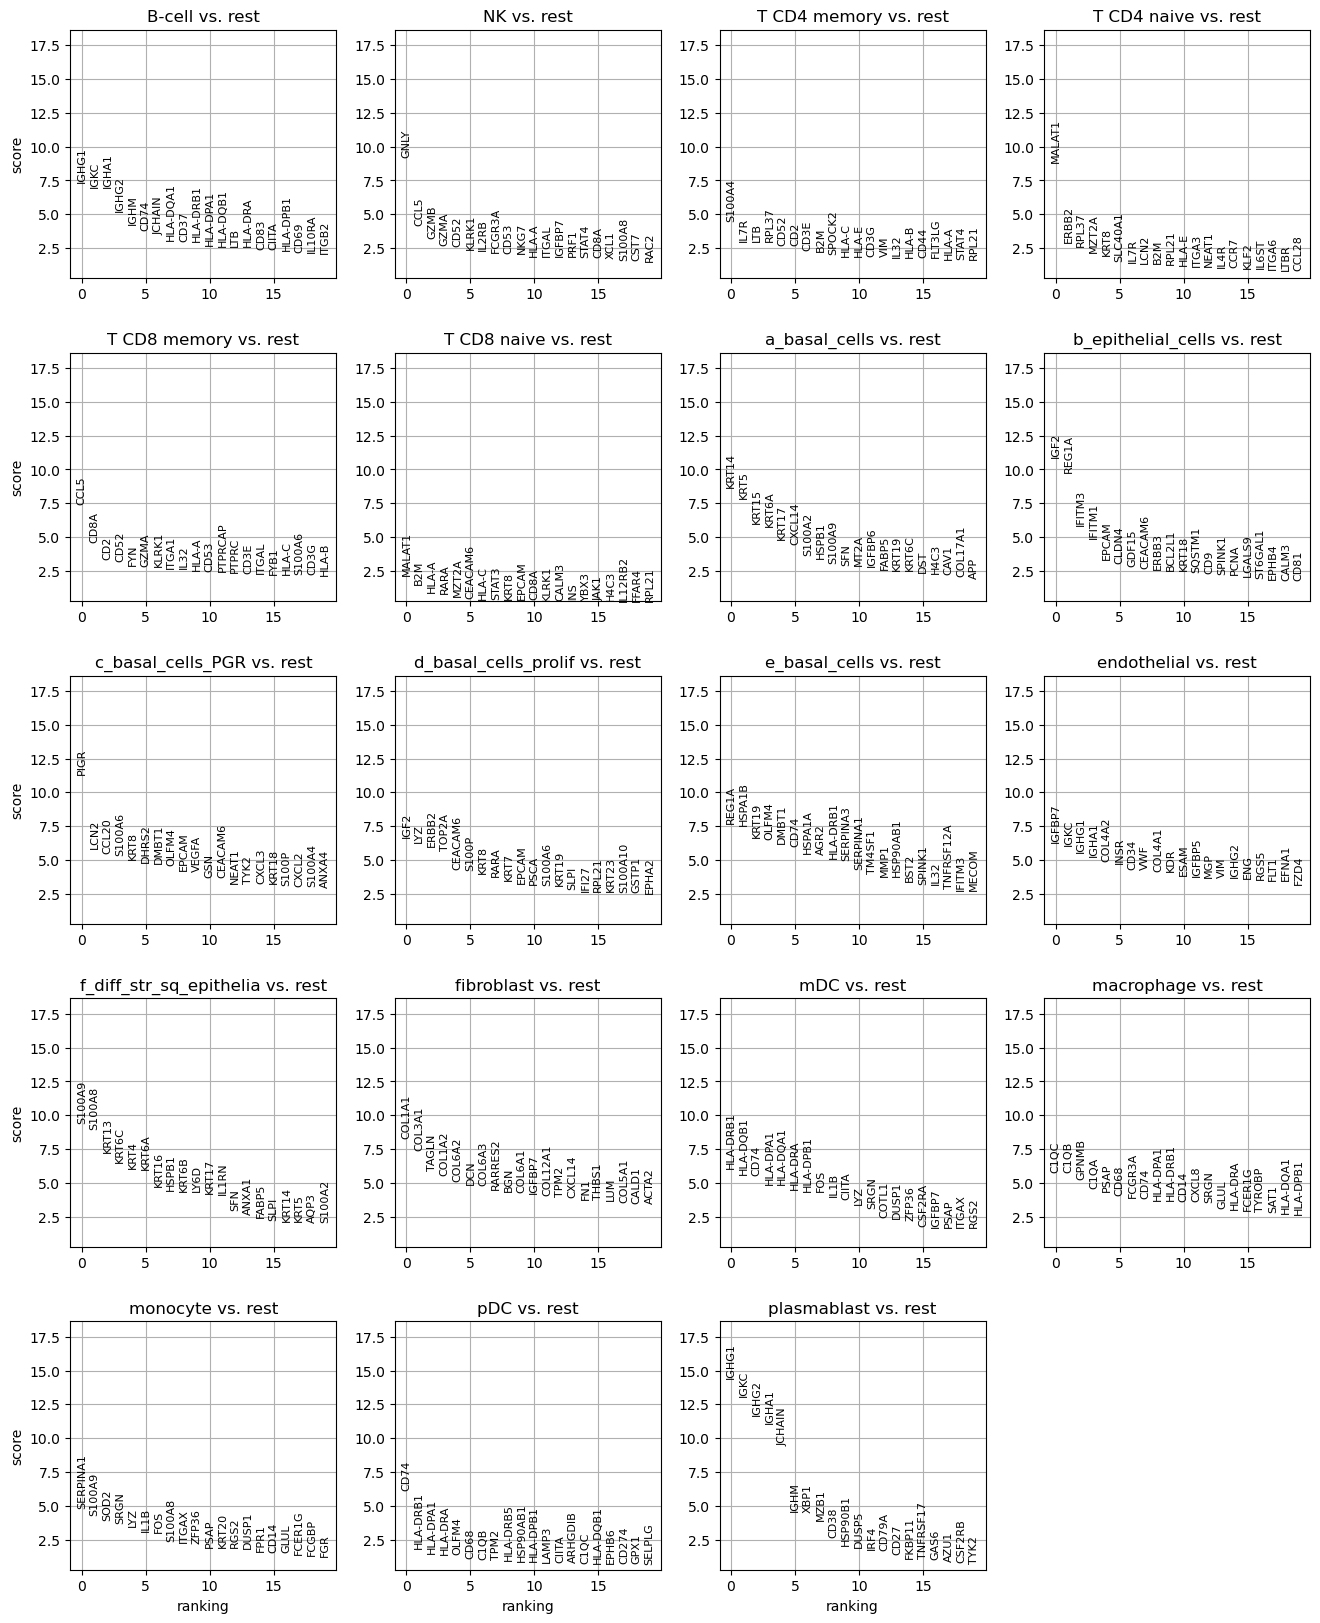

In [368]:
rcParams['figure.figsize'] = 4,4
rcParams['axes.grid'] = True
sc.pl.rank_genes_groups(adata_spatial_s)

In [351]:
adata_spatial_s.write("adata_spatial_s.h5ad")

In [319]:

# compute hiearchical clustering based on the
# given `var_names` from the raw matrix
sc.tl.dendrogram(adata_spatial_s, 'new_clust', var_names=marker_genes, use_raw=True)
rcParams['figure.figsize'] = 4,8
ax = sc.pl.dendrogram(adata_spatial_s, 'new_clust', orientation='left')

AttributeError: 'NoneType' object has no attribute 'var_names'

In [321]:
# compute hiearchical clustering based on the
# given `var_names` from the raw matrix
sc.tl.dendrogram(adata_spatial_s, 'new_clust', n_pcs=30)

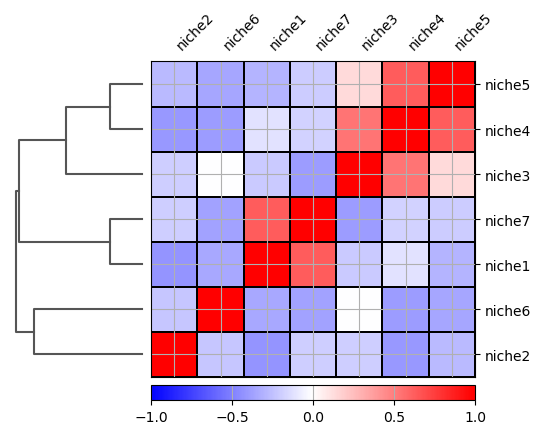

In [384]:
ax = sc.pl.correlation_matrix(adata_spatial_s, 'nclust')

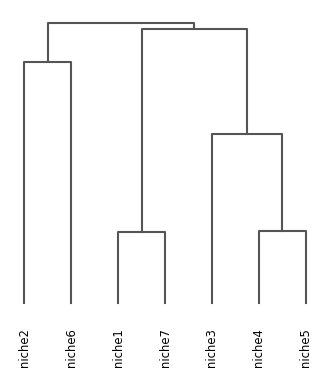

In [382]:

from matplotlib import rcParams
rcParams['figure.figsize'] = 4,4
ax = sc.pl.dendrogram(adata_spatial_s, 'nclust')

In [ ]:
 adata_spatial_s.obs['nclust']=adata_spatial_s.obs['nclust'].astype('category')
 adata_spatial_s.obs['library_id']=adata_spatial_s.obs['library_id'].astype('category')
 adata_spatial_s.obs['n_clust']=adata_spatial_s.obs['new_clust'].astype('category')

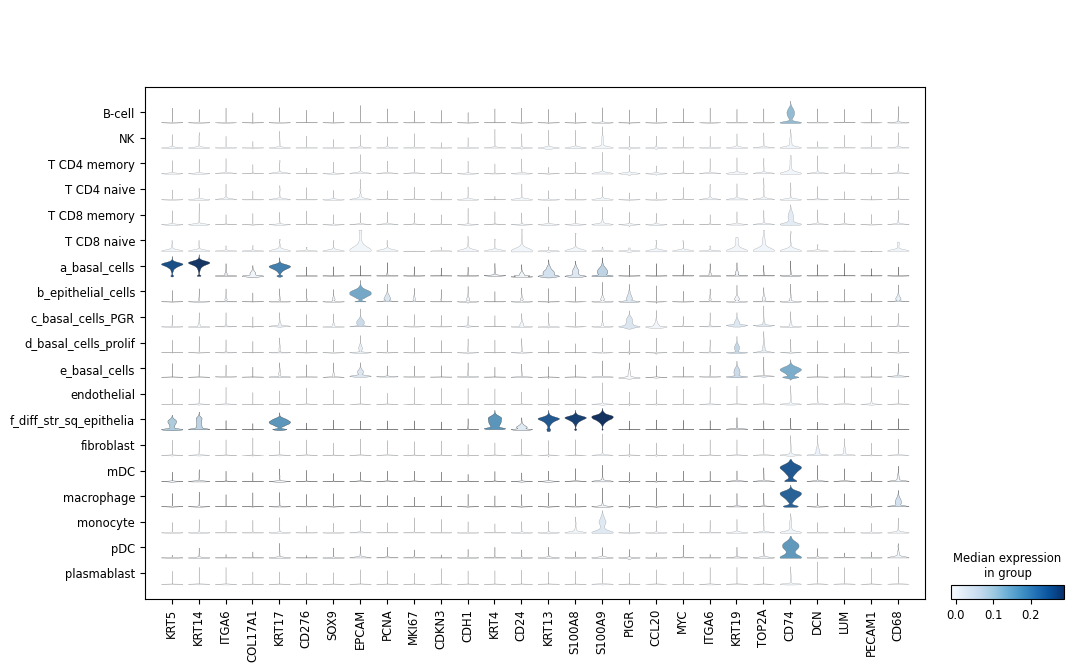

In [330]:

a= ['KRT5','KRT14','ITGA6', 'COL17A1','KRT17']
b= ['CD276', 'SOX9', 'EPCAM', 'PCNA','MKI67','CDKN3', 'CDH1']
f= ['KRT4', 'CD24', 'KRT13','S100A8','S100A9']
c= ['PIGR', 'CCL20', 'MYC', 'ITGA6']
d= ['KRT19', 'TOP2A']
e= ['CD74'] 

sel_genes = ['KRT5','KRT14','ITGA6', 'COL17A1','KRT17','CD276', 'SOX9', 
             'EPCAM', 'PCNA','MKI67','CDKN3', 'CDH1', 'KRT4', 'CD24',
             'KRT13','S100A8','S100A9','PIGR', 'CCL20', 'MYC', 'ITGA6',
             'KRT19', 'TOP2A', 'CD74','DCN','LUM','PECAM1','CD68']
             
            

ax = sc.pl.stacked_violin(adata_spatial_s, sel_genes, groupby='new_clust')

In [348]:
adata_spatial_s = adata_spatial_s.raw.to_adata()


AttributeError: 'NoneType' object has no attribute 'to_adata'

We can also visualize the clustering result in spatial coordinates. For that, we first need to save the cluster colors in a dictionary. We can then plot the Visium tissue fo the Anterior and Posterior Sagittal view, alongside each other.

In [94]:
clusters_colors = dict(
    zip([str(i) for i in range(15)], adata_spatial.uns["clusters_colors"])
)

In [96]:
ad = adata_spatial[adata_spatial.obs.library_id == library, :].copy()

In [97]:
ad

AnnData object with n_obs × n_vars = 40288 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'Idents', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'library_id', 'clusters'
    uns: 'spatial', 'log1p', 'neighbors', 'umap', 'leiden', 'clusters_colors', 'library_id_colors'
    obsm: 'spatial', 'spatial_fov', 'X_scanorama', 'X_umap'
    obsp: 'distances', 'connectivities'

/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/maurizio.aurora/seurat_spatial/lib/python3.9/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


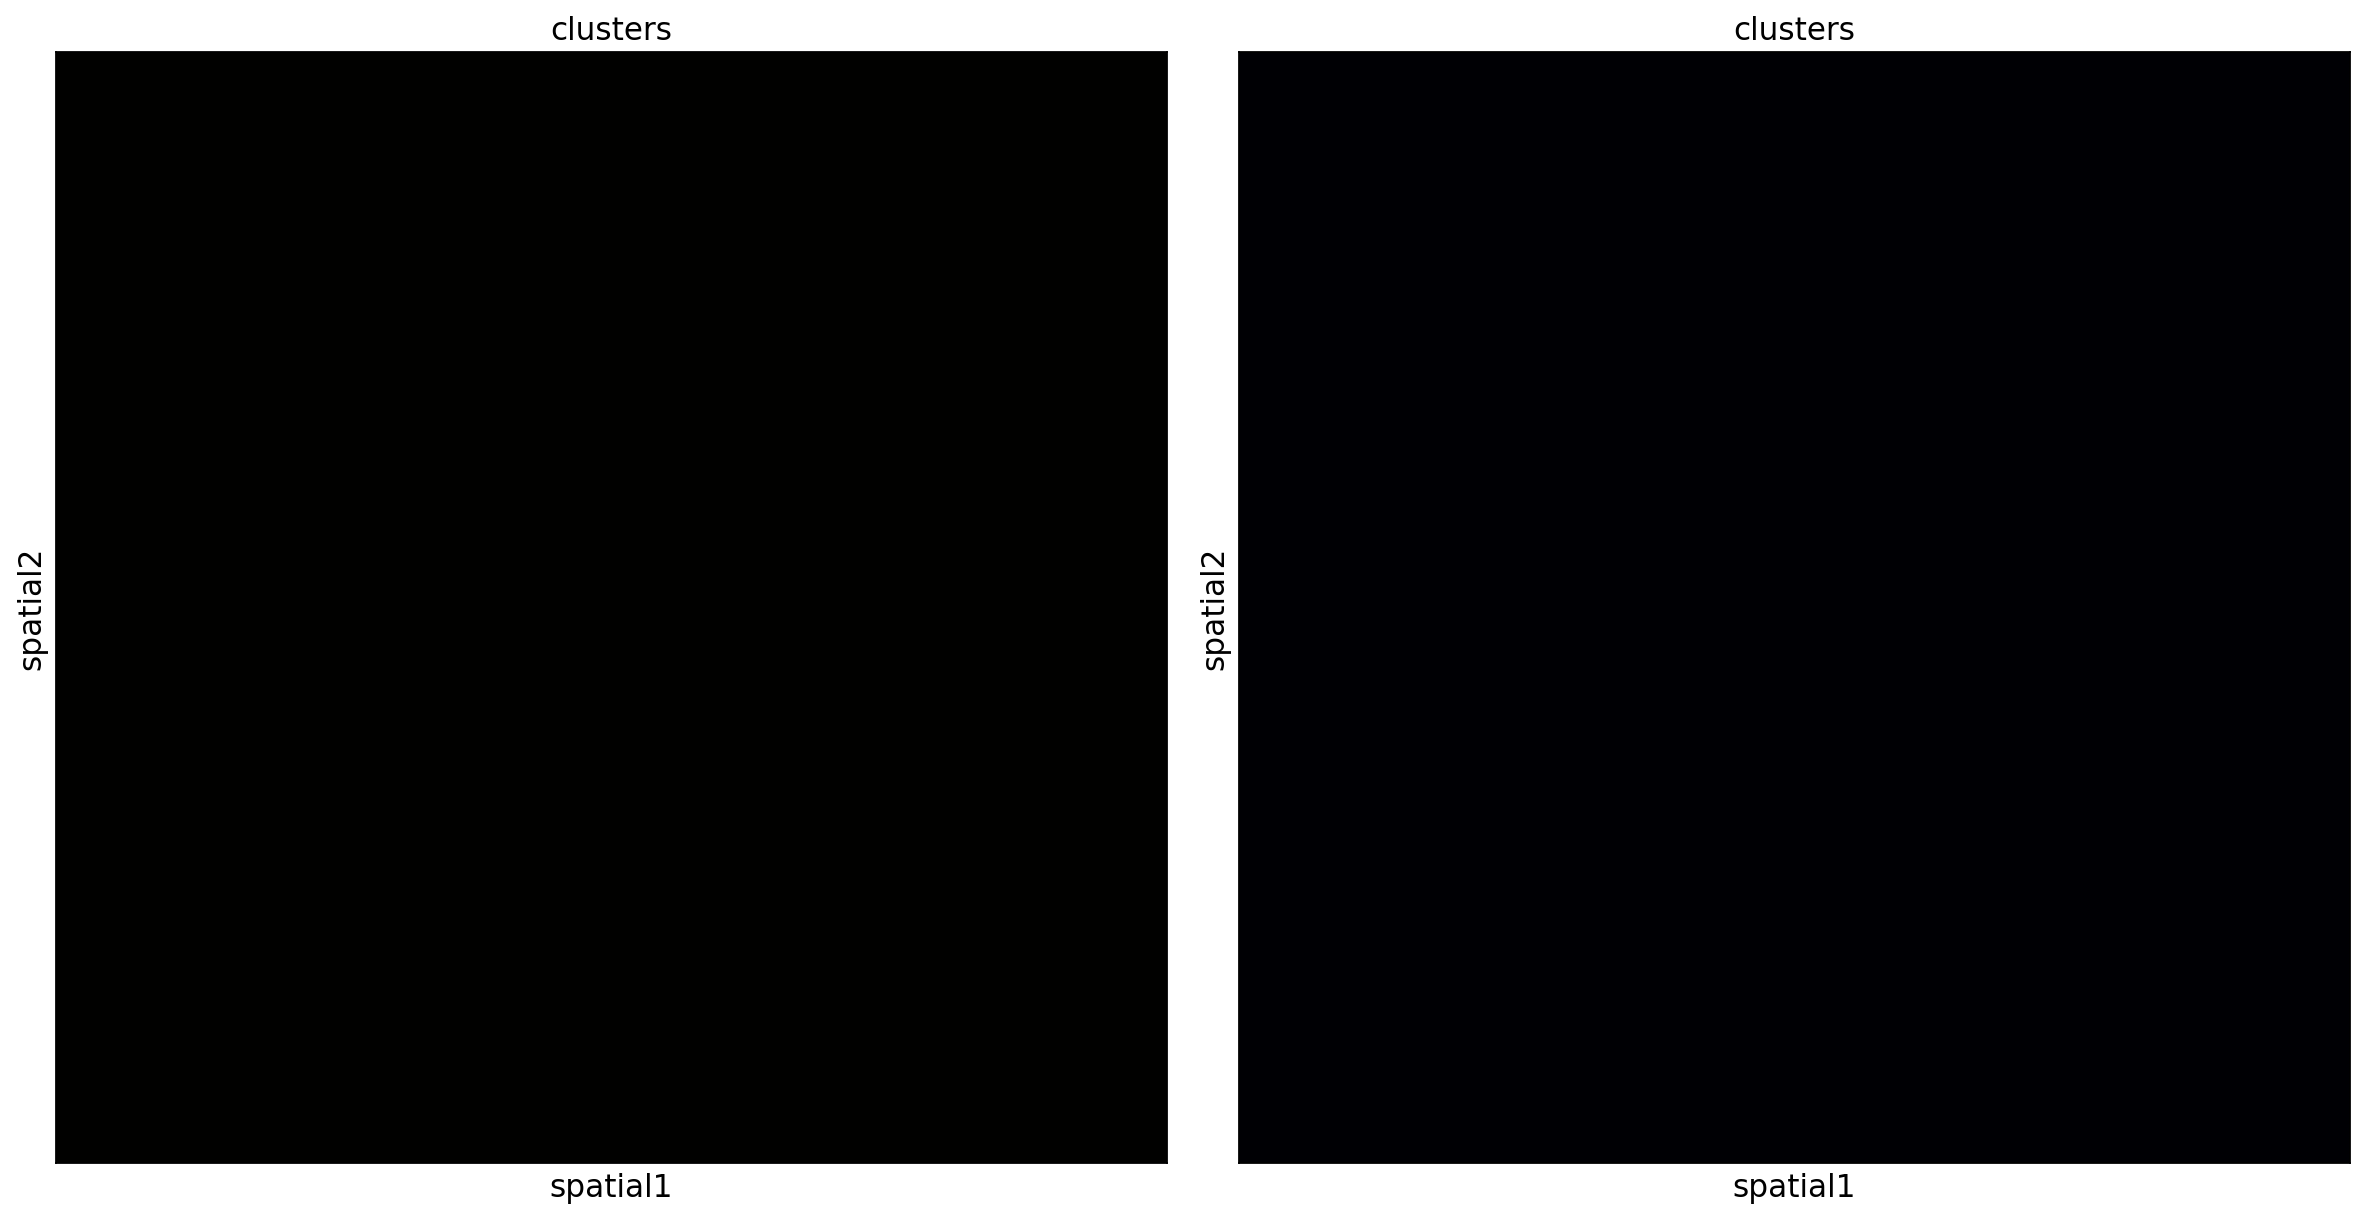

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

for i, library in enumerate(
    ["10", "9"]
):
    ad = adata_spatial[adata_spatial.obs.library_id == library, :].copy()
    sc.pl.spatial(
        ad,
        img_key="hires",
        library_id=library,
        color="clusters",
        size=1.5,
        palette=[
            v
            for k, v in clusters_colors.items()
            if k in ad.obs.clusters.unique().tolist()
        ],
        legend_loc=None,
        show=False,
        ax=axs[i],
    )

plt.tight_layout()